# Python Final Ödevi

Muhammed Ali Türkan 211002012 3.Sınıf İkinci Öğretim

---



# Veri Seti: Hunt Prices for North American Mammals

Bu veri kümesi, on beş farklı Kuzey Amerika büyük memeli türü için 721 rehberli av hakkında ayrıntılı bilgiler sunmaktadır. Regresyon ile fiyat tahmini yapılacak ve hata değerleri karşılaştırılacaktır.

Tür: Avlanan memeli türünün adı. (Metin)

İl/Devlet: Avlanmanın gerçekleştiği il veya devlet. (Metin)

Fiyat: Avın toplam maliyeti. (Sayısal)

Gün Sayısı: Avın kaç gün sürdüğü. (Sayısal)

Günlük Fiyat: Avın günlük maliyeti. (Sayısal)

S Rank: Avlanan türün nadirliği. (Sayısal)

Durum: Avlanan türün koruma durumu. (Metin)

Sınıflandırma: Avlanan türün sınıflandırması (etçil, hepçil
veya otçul). (Metin)

Ort. Küt.: Avlanan türün ortalama kütlesi. (Sayısal)

SCI: Avlanan türün Safari Club International puanı. (Sayısal)

Enlem: Avlanmanın gerçekleştiği konumun enlemi. (Sayısal)

# Veriye ilk Bakış

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mihalikdata.csv")
print(data.head())

         Species Province/State  Price  Number of days  Day price S Rank  \
0  Mountain Lion        Alberta  15930            10.0       1593     S4   
1  Mountain Lion        Alberta   9500            10.0        950     S4   
2  Mountain Lion        Alberta  10000            10.0       1000     S4   
3  Mountain Lion        Alberta  12500            10.0       1250     S4   
4  Mountain Lion        Arizona   5000             5.0       1000     S4   

   Status Classification  Avg Mass SCI  Latitude  
0     4.0      Carnivore      60.4   Y   54.5000  
1     4.0      Carnivore      60.4   Y   54.5000  
2     4.0      Carnivore      60.4   Y   54.5000  
3     4.0      Carnivore      60.4   Y   54.5000  
4     4.0      Carnivore      60.4   Y   34.1661  


Öncelikle eksik alanların kontrolünü yapıyoruz

In [ ]:
data.isnull().sum()

Species            0
Province/State     0
Price              0
Number of days     0
Day price          0
S Rank            47
Status            47
Classification     0
Avg Mass           0
SCI                0
Latitude           0
dtype: int64

47 alan boş , bunları en yakın değerlerle dolduruyoruz.

In [ ]:
data['S Rank'].fillna(data['S Rank'].mode().iloc[0], inplace=True)
data['Status'].fillna(data['Status'].mode().iloc[0], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         721 non-null    object 
 1   Province/State  721 non-null    object 
 2   Price           721 non-null    int64  
 3   Number of days  721 non-null    float64
 4   Day price       721 non-null    int64  
 5   S Rank          721 non-null    object 
 6   Status          721 non-null    float64
 7   Classification  721 non-null    object 
 8   Avg Mass        721 non-null    float64
 9   SCI             721 non-null    object 
 10  Latitude        721 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 62.1+ KB


In [ ]:
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype('category')
print(data.dtypes)

Species           category
Province/State    category
Price                int64
Number of days     float64
Day price            int64
S Rank            category
Status             float64
Classification    category
Avg Mass           float64
SCI               category
Latitude           float64
dtype: object


Burada kategorik verilein veri tipleri düzeltildi.

In [ ]:
data.isnull().sum()

Species           0
Province/State    0
Price             0
Number of days    0
Day price         0
S Rank            0
Status            0
Classification    0
Avg Mass          0
SCI               0
Latitude          0
dtype: int64

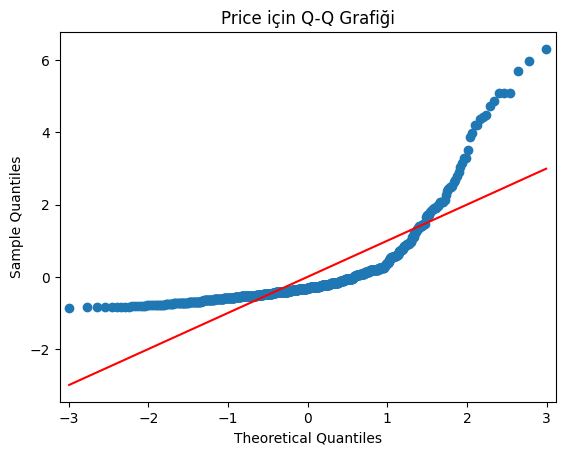

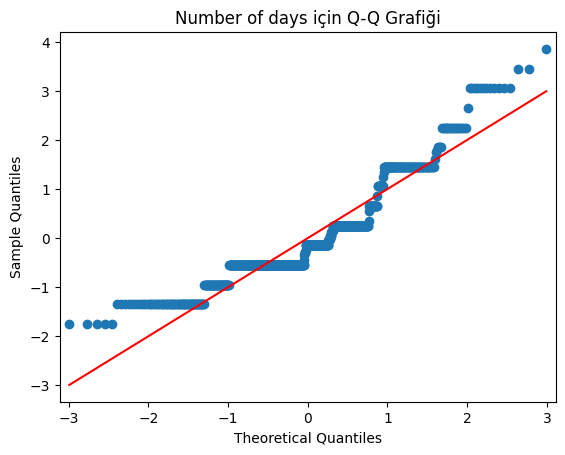

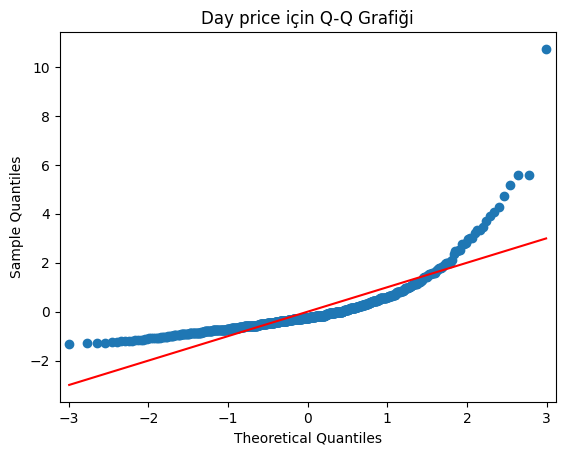

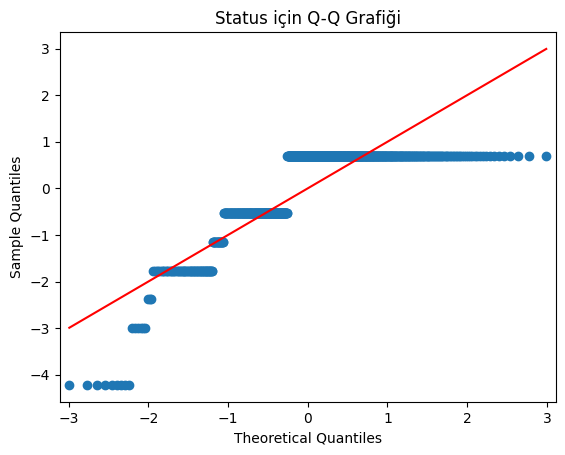

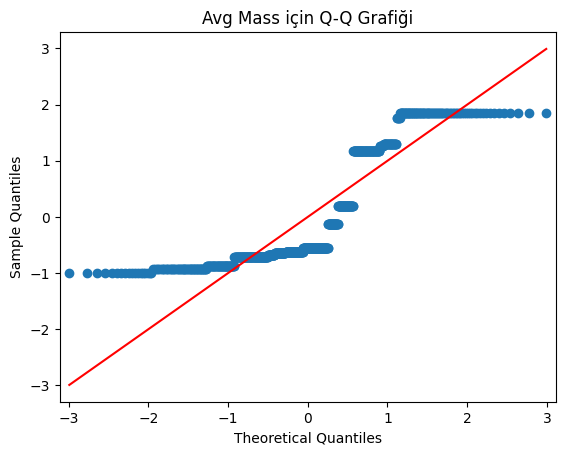

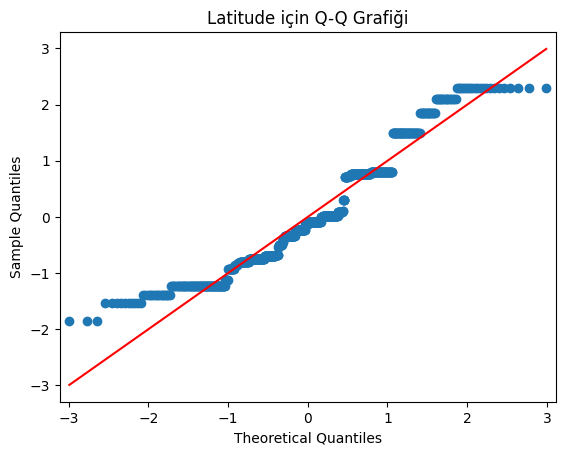

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats



# Sayısal veri içeren sütunları seçiyoruz
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Hem 'Price' hem de diğer sayısal sütunlar için Q-Q grafikleri oluşturuyoruz
for column in numerical_columns:
    # Sütun verilerini çıkarıyoruz
    column_data = data[column]

    # Bir Q-Q grafiği oluşturuyoruz
    sm.qqplot(column_data, line='s', fit=True, dist=stats.norm, marker='o')
    plt.title(f'{column} için Q-Q Grafiği')
    plt.show()


'Price' değişkeninin dağılımı, özellikle daha yüksek değerlerde normal dağılımdan sapmaktadır.

Gün Sayısı normal dağılımdan sapma göstermektedir, daha düşük değerlere doğru çarpıklık göstermektedir.

'Day price' dağılımı, 'Price' gibi normal daha yüksek değerlerde dağılımdan sapma göstermektedir.

'Status' değişkeninin dağılımı, normal dağılımdan önemli ölçüde sapma göstermektedir, sürekli değil kategorik veya kesikli bir doğaya işaret etmektedir.

Avg. mass değişkeni de normal dağılımı takip etmemekte, daha çok düşük aralıklarda yoğunlaşmakta ve daha yüksek değerlere doğru uzun kuyruğa sahiptir.

<Axes: >

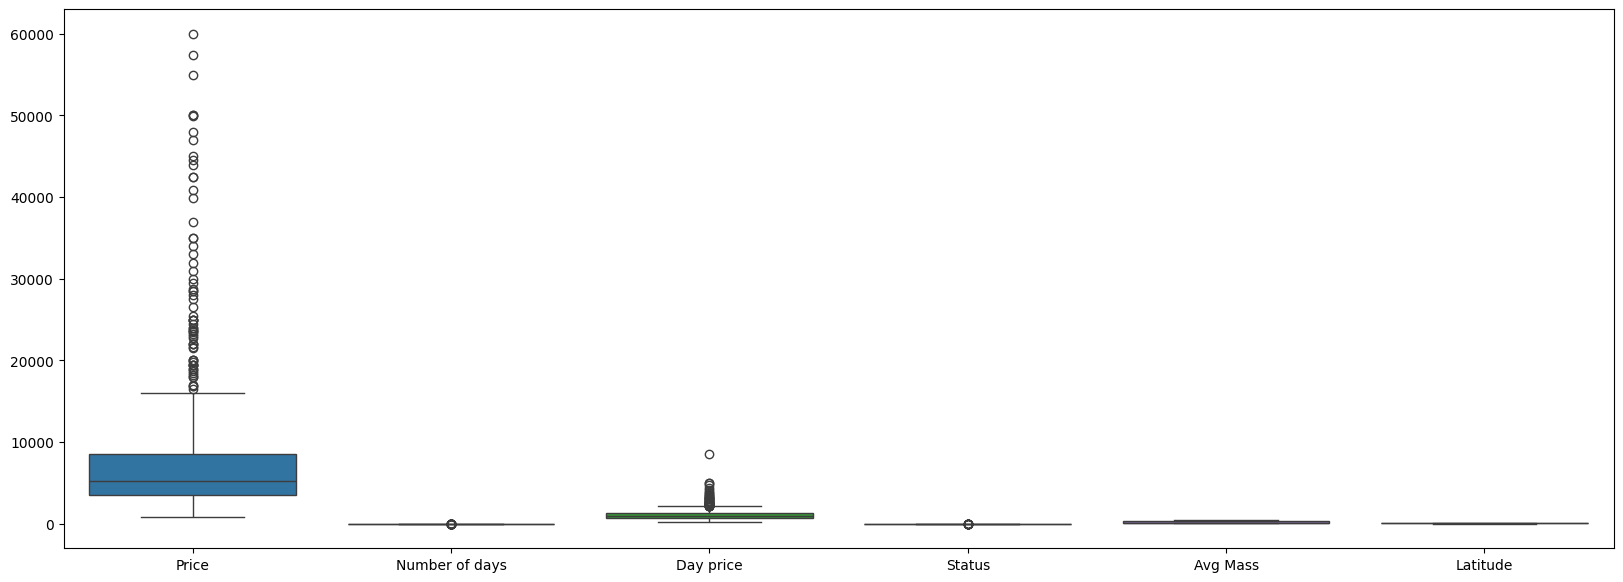

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

Fiyatta aykırı değerler bulunmakta

<Figure size 1200x800 with 0 Axes>

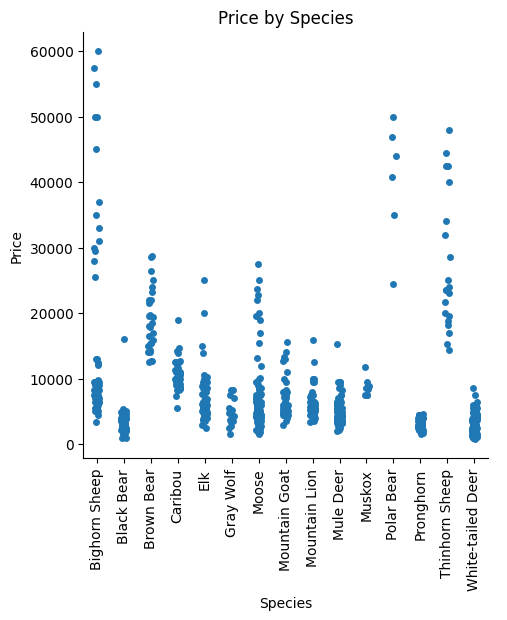

In [ ]:
#fiyat üzerinde diğer özelliklerin etkisini görmek istiyoruz
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.catplot(x="Species", y="Price", data=data)
plt.xticks(rotation=90)
plt.title("Price by Species")
plt.show()

In [ ]:
average_price_per_species = data.groupby('Species')['Price'].mean()

# Sonuçları yazdırma
print(average_price_per_species)

Species
Bighorn Sheep        15185.112903
Black Bear            3458.306122
Brown Bear           18771.428571
Caribou              10609.264706
Elk                   6990.657534
Gray Wolf             4775.611111
Moose                 7303.224719
Mountain Goat         7265.945946
Mountain Lion         6248.054545
Mule Deer             4955.400000
Muskox                8741.222222
Polar Bear           40200.000000
Pronghorn             3069.418182
Thinhorn Sheep       27242.409091
White-tailed Deer     3228.414894
Name: Price, dtype: float64


Türün fiyata büyük etkiye sahip olduğu ortalama fiyattan anlaşılıyor


<Figure size 1200x800 with 0 Axes>

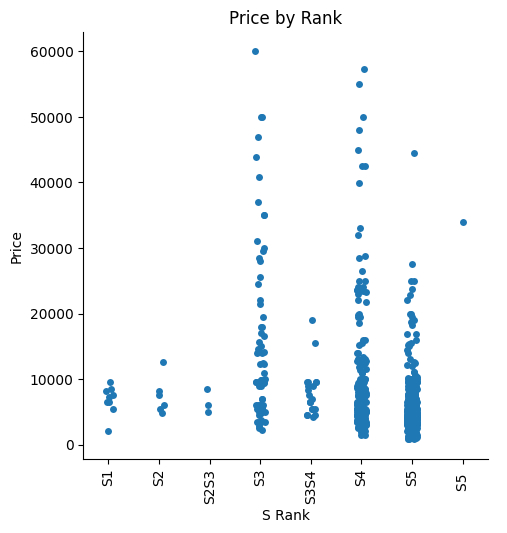

In [ ]:
#fiyat üzerinde diğer özelliklerin etkisini görmek istiyoruz
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.catplot(x="S Rank", y="Price", data=data)
plt.xticks(rotation=90)
plt.title("Price by Rank")
plt.show()

Bu grafikte S rankın fiyata etkisi anlaşılmıyor bu nedenle yüksek fiyatta yoğun olan rankı bulmak için farklı bir yöntem deniyoruz


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

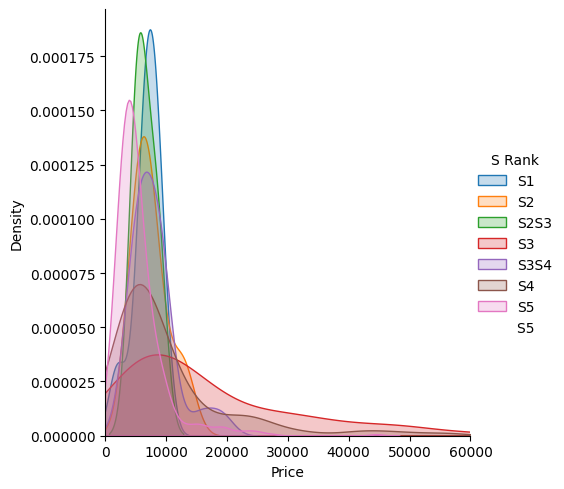

In [ ]:
(sns
 .FacetGrid(data,
              hue = "S Rank",
              height = 5,
              xlim = (0, 60000))
 .map(sns.kdeplot, "Price", shade= True)
 .add_legend()
);

In [ ]:
average_price_per_rank = data.groupby('S Rank')['Price'].mean()

# Sonuçları yazdırma
print(average_price_per_rank)

S Rank
S1       6830.000000
S2       7425.000000
S2S3     6500.000000
S3      16517.000000
S3S4     7954.000000
S4      10369.846995
S5       5532.646651
S5      34000.000000
Name: Price, dtype: float64


Ortalamaya bakılırsa ve hataları da düşünürsek S5 en değerli S1 en değersiz olacak şekilde bir sıralama olması gerek.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


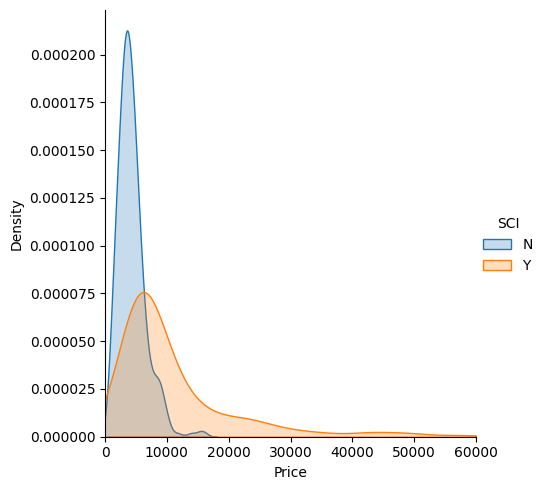

In [ ]:
(sns
 .FacetGrid(data,
              hue = "SCI",
              height = 5,
              xlim = (0, 60000))
 .map(sns.kdeplot, "Price", shade= True)
 .add_legend()
);

In [ ]:
average_price_per_sci = data.groupby('SCI')['Price'].mean()

# Sonuçları yazdırma
print(average_price_per_sci)

SCI
N     4256.606509
Y    11108.992167
Name: Price, dtype: float64


y özelliği n'den daha değerli


# Lineer Regresyon

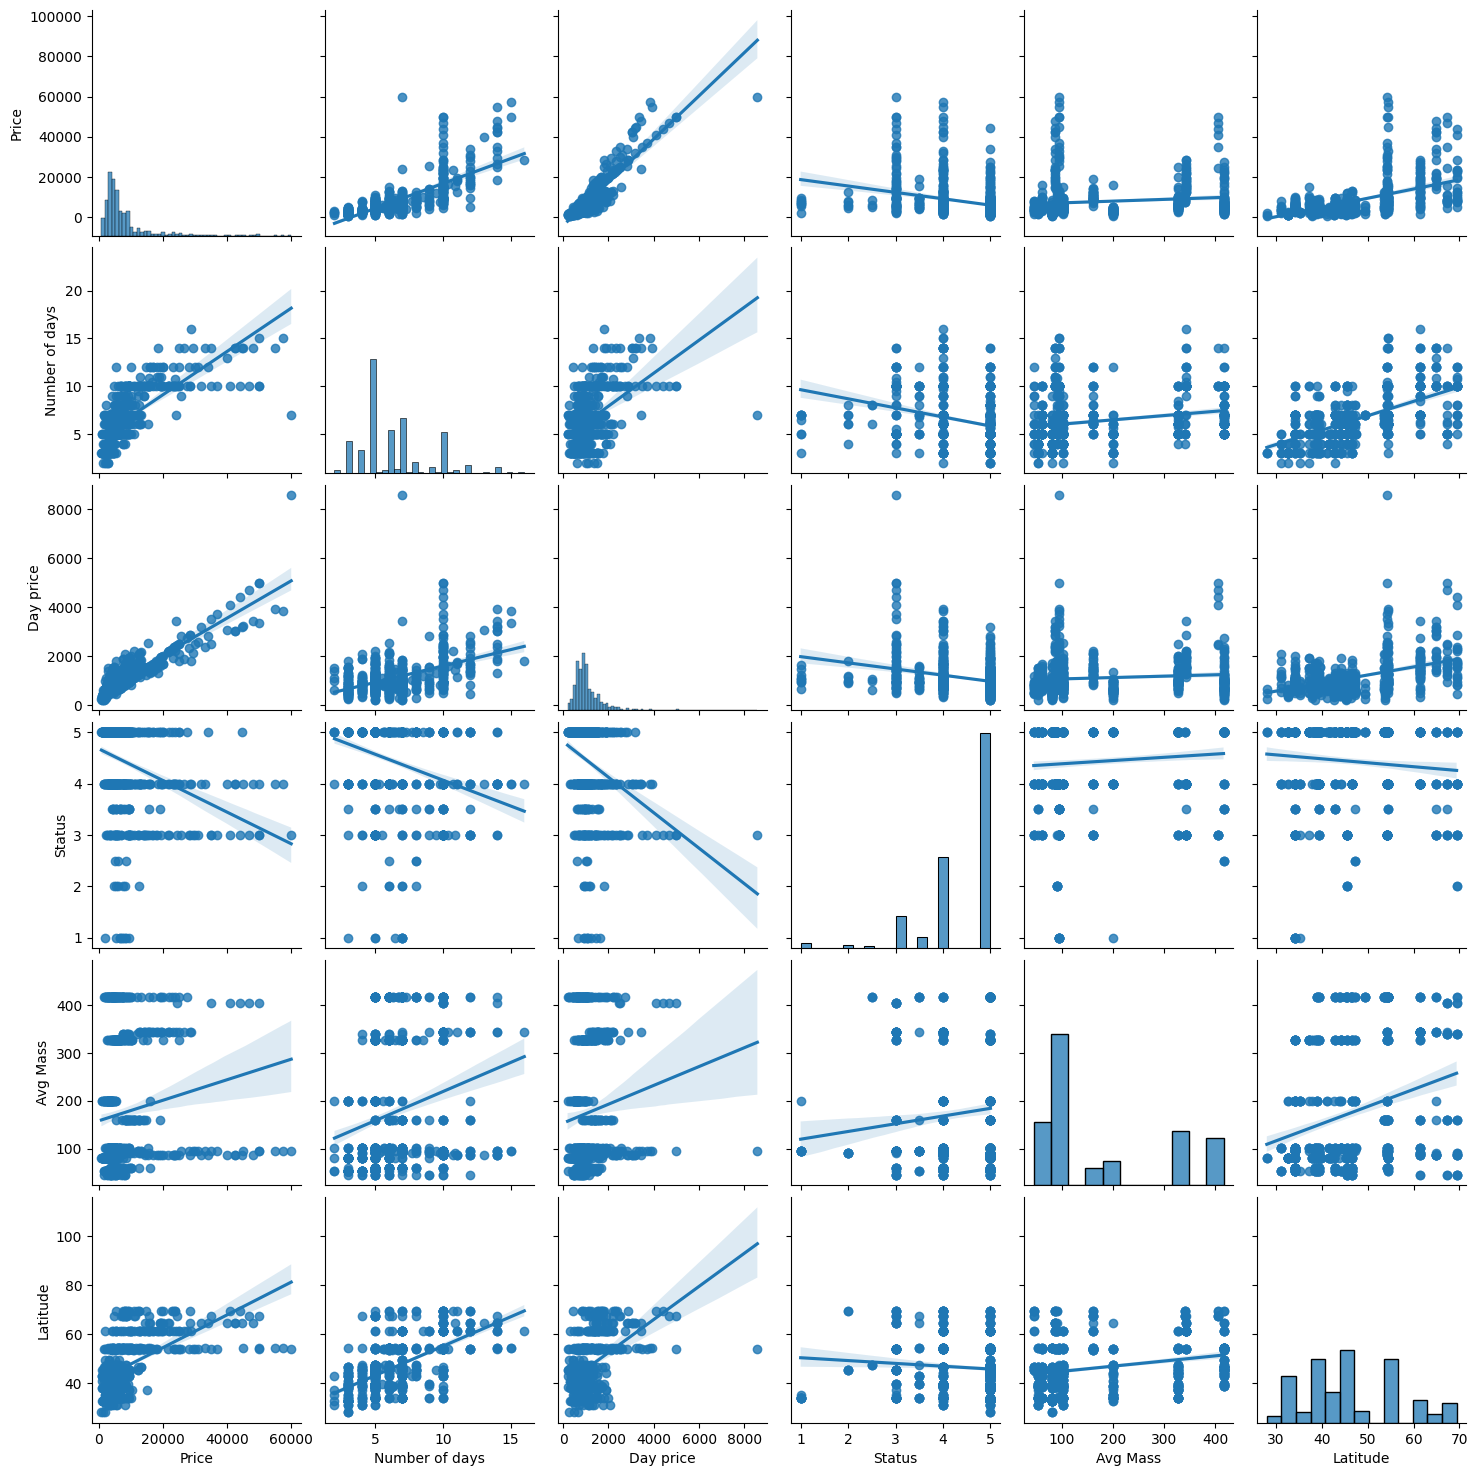

In [ ]:
sns.pairplot(data, kind  ="reg");

In [ ]:
data = pd.get_dummies(data)


from sklearn.preprocessing import MinMaxScaler

# Identify numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# Create x to store scaled values as floats
x = data[numeric_features].values.astype(float)

# Preparing for normalizing
min_max_scaler = MinMaxScaler()

# Transform the data to fit min-max processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[numeric_features] = pd.DataFrame(x_scaled, columns=numeric_features)

In [ ]:
data.head()

,Price,Number of days,Day price,Status,Avg Mass,Latitude,Species_Bighorn Sheep,Species_Black Bear,Species_Brown Bear,Species_Caribou,...,S Rank_S2S3,S Rank_S3,S Rank_S3S4,S Rank_S4,S Rank_S5,S Rank_S5,Classification_Carnivore,Classification_Ungulate,SCI_N,SCI_Y
0,0.255574,0.571429,0.166408,0.75,0.041481,0.639951,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,0.146959,0.571429,0.089595,0.75,0.041481,0.639951,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
2,0.155405,0.571429,0.095568,0.75,0.041481,0.639951,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
3,0.197635,0.571429,0.125433,0.75,0.041481,0.639951,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,0.070946,0.214286,0.095568,0.75,0.041481,0.147818,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


Burada daha anlamlı sonuçlar almak için normalizasyon yaptık.

In [ ]:
  data.corr()

,Price,Number of days,Day price,Status,Avg Mass,Latitude,Species_Bighorn Sheep,Species_Black Bear,Species_Brown Bear,Species_Caribou,...,S Rank_S2S3,S Rank_S3,S Rank_S3S4,S Rank_S4,S Rank_S5,S Rank_S5,Classification_Carnivore,Classification_Ungulate,SCI_N,SCI_Y
Price,1.000000,0.748216,0.903317,-0.312873,0.135996,0.554739,0.270663,-0.145102,0.264650,0.073062,...,-0.010930,0.328525,0.001203,0.174636,-0.350940,0.117779,0.054640,-0.054640,-0.414003,0.414003
Number of days,0.748216,1.000000,0.480256,-0.309670,0.233253,0.601676,0.276286,-0.157908,0.347782,0.103172,...,0.024904,0.279460,0.102226,0.158675,-0.345681,0.083982,0.099964,-0.099964,-0.559141,0.559141
Day price,0.903317,0.480256,1.000000,-0.295568,0.105199,0.472469,0.221732,-0.162562,0.194063,0.112616,...,-0.019767,0.314953,-0.022499,0.152668,-0.318303,0.092444,0.010787,-0.010787,-0.325810,0.325810
Status,-0.312873,-0.309670,-0.295568,1.000000,0.100875,-0.094355,-0.477305,0.058131,-0.209165,-0.067109,...,-0.153704,-0.555279,-0.199220,-0.312818,0.847657,0.025764,-0.209469,0.209469,0.391814,-0.391814
Avg Mass,0.135996,0.233253,0.105199,0.100875,1.000000,0.274990,-0.189905,0.051118,0.259828,-0.026185,...,0.119524,0.020320,0.006731,-0.165619,0.143732,-0.025474,-0.035299,0.035299,-0.236681,0.236681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S Rank_S5,0.117779,0.083982,0.092444,0.025764,-0.025474,0.068649,-0.011431,-0.010063,-0.007491,-0.008291,...,-0.002409,-0.011731,-0.006455,-0.021735,-0.045696,1.000000,-0.019583,0.019583,-0.035010,0.035010
Classification_Carnivore,0.054640,0.099964,0.010787,-0.209469,-0.035299,0.079075,-0.161173,0.513896,0.382538,-0.116896,...,-0.033965,0.163902,-0.070982,0.289509,-0.307316,-0.019583,1.000000,-1.000000,-0.162885,0.162885
Classification_Ungulate,-0.054640,-0.099964,-0.010787,0.209469,0.035299,-0.079075,0.161173,-0.513896,-0.382538,0.116896,...,0.033965,-0.163902,0.070982,-0.289509,0.307316,0.019583,-1.000000,1.000000,0.162885,-0.162885
SCI_N,-0.414003,-0.559141,-0.325810,0.391814,-0.236681,-0.391149,-0.288146,0.287445,-0.188830,-0.208987,...,-0.060724,-0.237482,-0.113128,-0.196634,0.397295,-0.035010,-0.162885,0.162885,1.000000,-1.000000


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Select top k features based on mutual information (regression)
k_best = SelectKBest(score_func=mutual_info_regression, k='all')
k_best.fit(X_encoded, y)

# Display scores of features
print("Mutual Information Scores of Features:\n", pd.Series(k_best.scores_, index=X.columns).sort_values(ascending=False))

Mutual Information Scores of Features:
 Day price                    0.639493
Number of days               0.405680
SCI_Y                        0.237711
Latitude                     0.217324
SCI_N                        0.196683
                               ...   
Province/State_Illinois      0.000000
Province/State_Idaho         0.000000
Province/State_Florida       0.000000
Province/State_California    0.000000
Province/State_Missouri      0.000000
Length: 78, dtype: float64


Burada fiyata en çok etki eden değişkenleri sıraladık

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Use Linear Regression as the estimator for RFE
estimator = LinearRegression()

# Number of features to select (adjust as needed)
n_features_to_select = min(10, X.shape[1])

# Create RFE model
rfe = RFE(estimator, n_features_to_select=n_features_to_select)

# Fit RFE on the encoded feature set and target variable
rfe.fit(X_encoded, y)

# Display ranking of features
print("RFE Ranking of Features:\n", pd.Series(rfe.ranking_, index=X.columns).sort_values())

RFE Ranking of Features:
 Classification_Carnivore            1
Species_Polar Bear                  1
Province/State_British Columbia     1
Species_Mountain Lion               1
Species_Gray Wolf                   1
                                   ..
Species_Pronghorn                  65
SCI_N                              66
Number of days                     67
SCI_Y                              68
Day price                          69
Length: 78, dtype: int64


Başka bir yöntemle özelliklerin tahmin gücüne etkisini belirledik

Bir veri setindeki bağımsız değişkenlerin hangilerinin bağımlı değişkeni tahmin etmek için en uygun olduğunu belirlemek için bir dizi teknik kullanılabilir.

Korelasyon Analizi: Bağımsız değişkenlerin hedef değişkenle (fiyat) olan ilişkilerini belirlemek için korelasyon analizi yapılabilir. Yüksek korelasyon katsayıları, güçlü bir ilişkiyi gösterebilir ve bu değişkenlerin fiyatı tahmin etmede önemli olabileceğini düşündürebilir.

Regresyon Analizi: Regresyon analizi, bağımsız değişkenlerin hedef değişkenle olan ilişkisini modellemek için kullanılabilir. Bu analiz, hangi bağımsız değişkenlerin hedef değişkeni tahmin etmek için en uygun olduğunu belirlemek için katsayılarını ve p-değerlerini dikkate alır.

Özellik Önem Derecelendirmesi: Makine öğrenimi modelleri, özelliklerin (bağımsız değişkenlerin) hedef değişkeni tahmin etmedeki önemini derecelendirebilir. Özellik önem derecelendirmesi, özelliklerin model performansına katkısını ölçmek için kullanılır ve en önemli olanları belirleyebilir.


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Use Lasso Regression as the base model for feature selection
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed

# Create SelectFromModel model
sfm = SelectFromModel(lasso_model)

# Fit SelectFromModel on the encoded feature set and target variable
sfm.fit(X_encoded, y)

# Display selected features
selected_features = X.columns[sfm.get_support()]
print("Selected Features using Lasso Regression:\n", selected_features)

Selected Features using Lasso Regression:
 Index(['Number of days', 'Day price', 'Avg Mass', 'Latitude'], dtype='object')


In [ ]:
# Assuming your dataset is stored in a variable named 'data'
correlation_with_price = data.corr()['Price'].abs().sort_values(ascending=False)

# Display features with high absolute correlation with 'Price'
important_features = correlation_with_price[1:13]  # Exclude the target variable
print("Önemli değerler:\n", important_features)

Önemli değerler:
 Day price                          0.903317
Number of days                     0.748216
Latitude                           0.554739
Species_Thinhorn Sheep             0.415525
SCI_N                              0.414003
SCI_Y                              0.414003
Species_Polar Bear                 0.358269
S Rank_S5                          0.350940
S Rank_S3                          0.328525
Province/State_British Columbia    0.315216
Status                             0.312873
Province/State_Yukon               0.286140
Name: Price, dtype: float64


Boolean değişkenleri sayısala çeviriyoruz.

In [ ]:
# Convert boolean columns to numeric (0 and 1)
data["Species_Thinhorn Sheep"] = data["Species_Thinhorn Sheep"].astype(int)
data["SCI_N"] = data["SCI_N"].astype(int)
data["SCI_Y"] = data["SCI_Y"].astype(int)
data["Species_Polar Bear"] = data["Species_Polar Bear"].astype(int)
data["S Rank_S5"] = data["S Rank_S5"].astype(int)
data["Province/State_British Columbia"] = data["Province/State_British Columbia"].astype(int)
data["Classification_Ungulate"] = data["Classification_Ungulate"].astype(int)
data["Province/State_Alberta"] = data["Province/State_Alberta"].astype(int)
data["Species_Bighorn Sheep"] = data["Species_Bighorn Sheep"].astype(int)
data["Species_Black Bear"] = data["Species_Black Bear"].astype(int)

from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = data[['Number of days', 'Day price','Status','Avg Mass','Latitude', 'Species_Thinhorn Sheep', 'SCI_N', 'SCI_Y', 'Species_Polar Bear', 'S Rank_S5', 'Province/State_British Columbia', 'Classification_Ungulate', 'Province/State_Alberta', 'Species_Bighorn Sheep', 'Species_Black Bear']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Number of days,2.695955
1,Day price,1.898639
2,Status,4.227057
3,Avg Mass,1.664310
4,Latitude,2.100059
5,Species_Thinhorn Sheep,1.629481
6,SCI_N,32.397757
7,SCI_Y,33.988504
8,Species_Polar Bear,1.338927
9,S Rank_S5,4.240825


# Kategoriler arası ilişkileri anlamlandırma

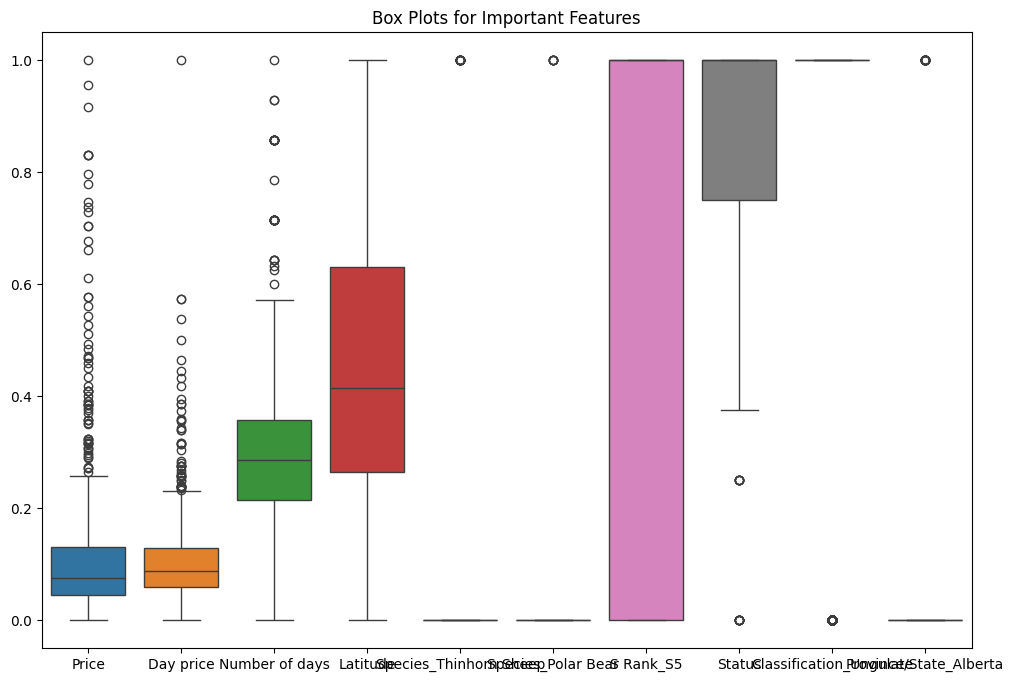

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original dataset
# Replace 'important_features' with the actual variable name you used
important_features = ["Price",
    "Day price",
    "Number of days",
    "Latitude",
    "Species_Thinhorn Sheep",
    "Species_Polar Bear",
    "S Rank_S5",
    "Status",
    "Classification_Ungulate",
    "Province/State_Alberta"]

# Select only the important features from the dataset
data = data[important_features]

# Create a box plot for all important features
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.title('Box Plots for Important Features')
plt.show()

Price:
Kutu grafiği fiyatların dağılımının nispeten simetrik olduğunu gösteriyor, yükseklerde birkaç aykırı değer bulunuyor.

Day Price:
Kutu grafiği, gün fiyatlarının dağılımının, fiyatların dağılımına kıyasla daha fazla değişkenlik gösteriyor.

Gün sayısı:
Kutu grafiği, gün sayısı için nispeten dar bir dağılım gösteriyor, verilerin çoğunun interquartile range (IQR) içinde yoğunlaştığını gösteriyor.
Enlem:
Kutu grafiği, enlem değerlerinde orta düzeyde bir yayılım olduğunu gösteriyor, dağılımın alt uçlarında birkaç aykırı değer bulunuyor.

Species_Thinhorn Sheep, Species_Polar Bear, Classification_Ungulate, Province/State_Alberta:
Bu özellikler kategorik olduğundan, dağılımı kutuların varlığı veya yokluğuyla temsil edilir. Her kutu, dağılımın interquartile range (IQR)'sını gösterir ve ortanca, kutunun içindeki yatay çizgi ile temsil edilir.

<Axes: >

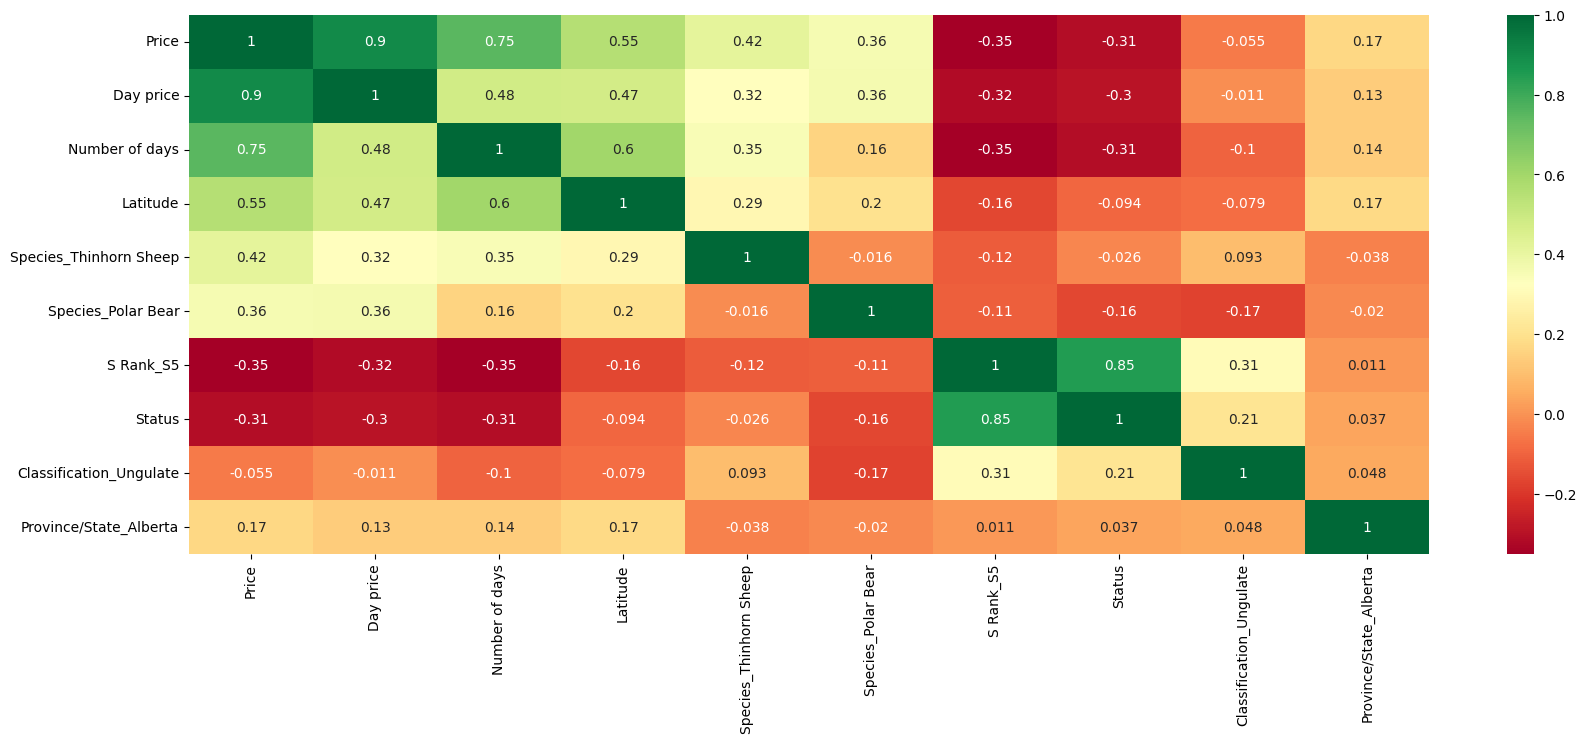

In [ ]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

Isı haritası ile özelliklerin arasındaki ilişkiyi gözlemliyoruz.

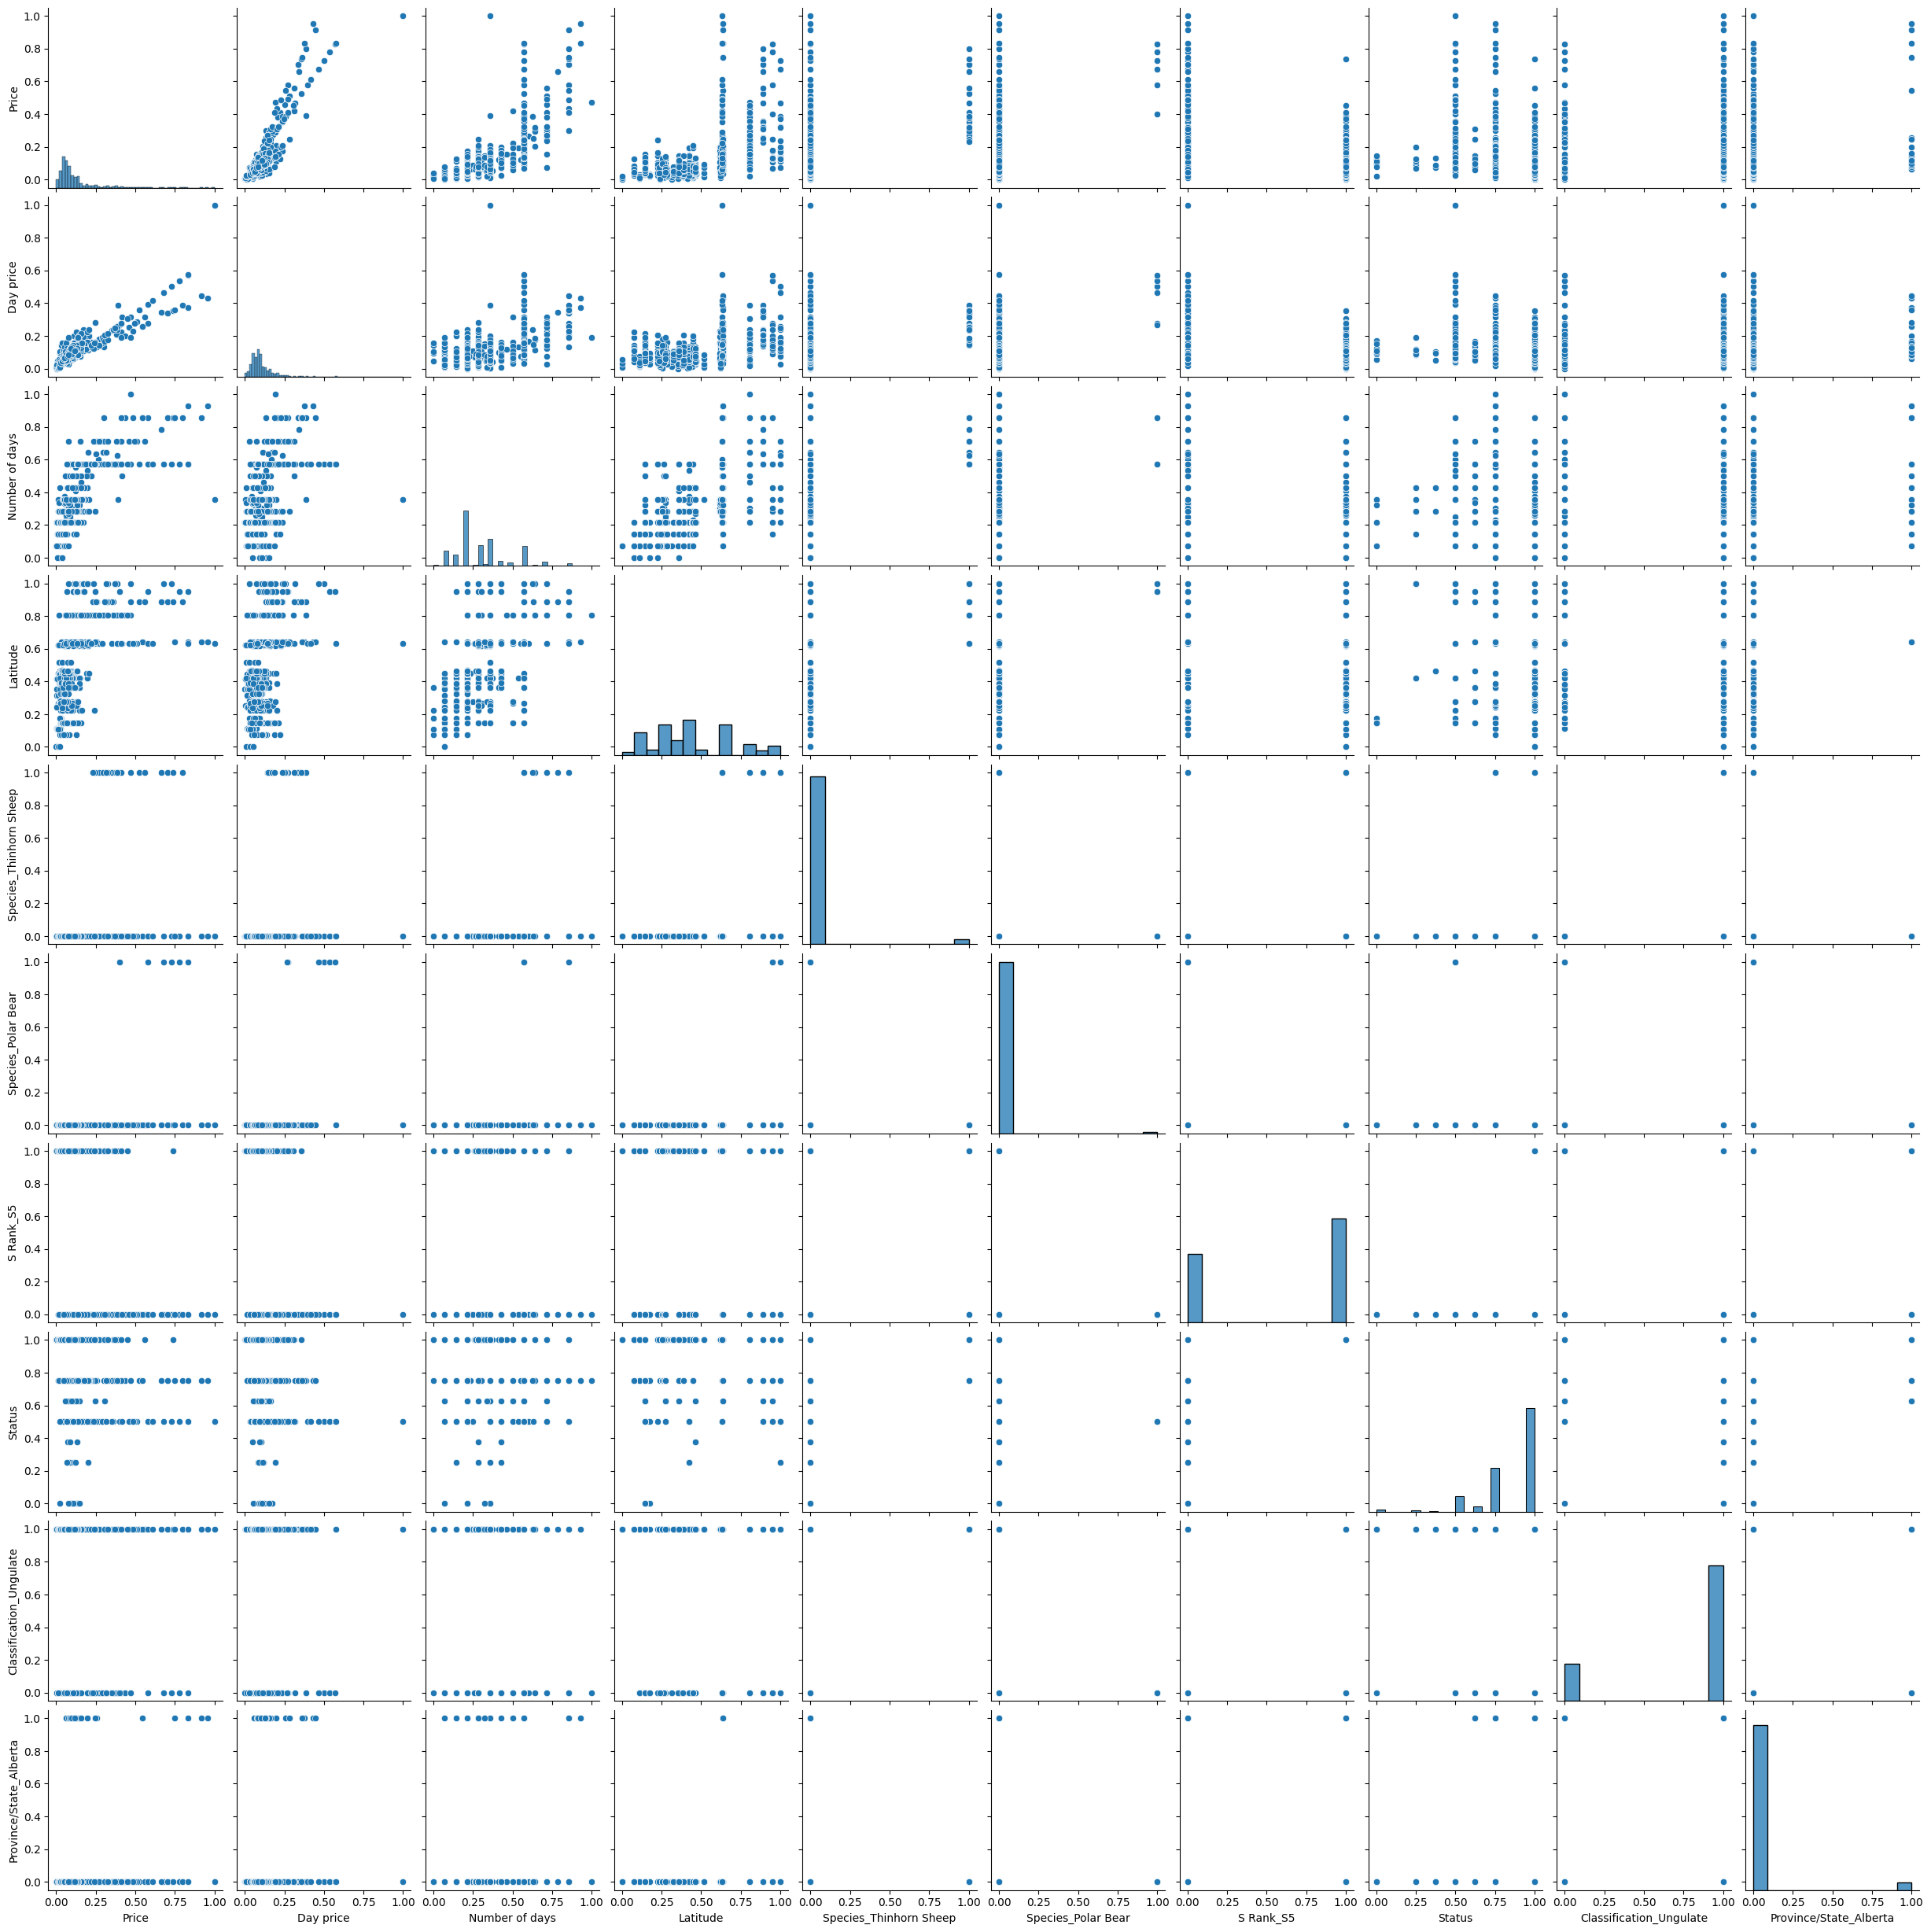

In [ ]:
sns.pairplot(data)


"Price" ile "Gün fiyatı" arasında pozitif bir ilişki görünüyor. "Gün fiyatı" arttıkça, "Price" da artma eğiliminde.

"Price" ile "Gün sayısı" arasında orta düzeyde pozitif bir ilişki görünüyor. Daha yüksek "Gün sayısı", genellikle daha yüksek "Price" ile ilişkili.


"Price" ile "Enlem" arasında net bir lineer ilişki görünmüyor. Noktaların dağılımı belirgin bir desen göstermeyen dağınık bir şekilde.


In [ ]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(
    data["Price"],
    data[
        [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Classification_Ungulate",
            "Province/State_Alberta",

            # Add other selected features here
        ]
    ],
).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2239.
Date:                Thu, 06 Jun 2024   Prob (F-statistic):                        0.00
Time:                        00:18:07   Log-Likelihood:                          1415.4
No. Observations:                 721   AIC:                                     -2813.
Df Residuals:                     712   BIC:                                     -2772.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Genel Model Uyumu:

Modelin, bağımlı değişken olan "Price" ile bağımsız değişkenler arasındaki varyansın yaklaşık %96,6'sını açıkladığını gösteren yüksek bir belirleme katsayısı  bulunmaktadır. Ayarlanmış R-kare değeri de yüksektir ve 0,965'tir, bu da modelin açıklayıcı gücünün, tahmincilerin sayısını düzelttikten sonra bile güçlü olduğunu göstermektedir.


Birkaç bağımsız değişken, "Price"ın istatistiksel olarak anlamlı tahmincileridir ve anlamlılık düzeyi 0,05 (P-değeri < 0,05) olarak belirlenmiştir. "Gün fiyatı," "Gün sayısı," "Species_Thinhorn Sheep," "Species_Polar Bear," "S Rank_S5," "Status," "Classification_Ungulat," ve "Province/State_Alberta" tümünün P-değerlerinin 0,05'ten küçük olması, bu değişkenlerin "Price" üzerindeki önemli etkilerini göstermektedir.


Katsayılar, karşılık gelen bağımsız değişkenlerdeki bir birimlik değişikliğin, diğer tüm değişkenler sabit tutulduğunda bağımlı değişken olan "Price" üzerindeki tahmini değişikliği temsil eder. Örneğin, "Gün fiyatı"ndaki bir birimlik artışın, diğer tüm değişkenler sabit tutulduğunda "Price"da tahmini 1,1244 birimlik bir artışla ilişkilendirildiği söylenebilir.


Pozitif katsayılar (örneğin, "Gün fiyatı," "Gün sayısı," "Species_Thinhorn Koyunu," "Species_Polar Ayısı," "S Rank_S5," ve "İl/İlçe_Alberta" için) "Price" ile pozitif bir ilişki gösterir. Bu değişkenler arttıkça, "Price" da artma eğilimindedir.

Negatif katsayılar (örneğin, "Enlem," "Durum," ve "Sınıflandırma_Ungulat" için) "Price" ile negatif bir ilişki gösterir. Bu değişkenler arttıkça, "Price" da azalma eğilimindedir.

In [ ]:
#sadece katsayıları görelim
model.params

Day price                  1.124439
Number of days             0.298235
Latitude                  -0.035605
Species_Thinhorn Sheep     0.081661
Species_Polar Bear         0.077077
S Rank_S5                  0.036759
Status                    -0.104902
Classification_Ungulate   -0.017599
Province/State_Alberta     0.029255
dtype: float64

In [ ]:
#katsayı detaylarını görelim
model.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Day price,1.1244,0.020,56.209,0.000,1.085,1.164
Number of days,0.2982,0.009,31.477,0.000,0.280,0.317
Latitude,-0.0356,0.007,-5.063,0.000,-0.049,-0.022
Species_Thinhorn Sheep,0.0817,0.008,10.122,0.000,0.066,0.098
Species_Polar Bear,0.0771,0.016,4.937,0.000,0.046,0.108
S Rank_S5,0.0368,0.004,8.847,0.000,0.029,0.045
Status,-0.1049,0.006,-17.947,0.000,-0.116,-0.093
Classification_Ungulate,-0.0176,0.003,-5.502,0.000,-0.024,-0.011
Province/State_Alberta,0.0293,0.006,4.605,0.000,0.017,0.042


In [ ]:
#katsayıların güven aralıkları
model.conf_int()

,0,1
Day price,1.085163,1.163714
Number of days,0.279633,0.316837
Latitude,-0.049412,-0.021798
Species_Thinhorn Sheep,0.065821,0.097500
Species_Polar Bear,0.046426,0.107728
S Rank_S5,0.028602,0.044916
Status,-0.116378,-0.093426
Classification_Ungulate,-0.023878,-0.011319
Province/State_Alberta,0.016783,0.041728


In [ ]:
#modelin anlamlılığına dair p-value değerini görelim
model.f_pvalue

0.0

In [ ]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [ ]:
#f istatistiği
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  2239.27


In [ ]:
#modelin hata kareler ortalaması
#ortalaması 14 olan satış değişkeni için mse çok yüksek çıkmış. kabul edilebilir bir değer değildir.
model.mse_model

2.6181655024310313

In [ ]:
#düzeltilmiş rkare değeri
model.rsquared_adj

0.9654452882942732

In [ ]:
#modelden tahmin edilen y değerleri
model.fittedvalues[0:5]

0    0.285329
1    0.198957
2    0.205674
3    0.239255
4    0.087428
dtype: float64

In [ ]:
#gercek y degerleri
y[0:5]

0    0.255574
1    0.146959
2    0.155405
3    0.197635
4    0.070946
Name: Price, dtype: float64

In [ ]:
#model denklemi
print("Day Price = " +  str("%.2f" % model.params[0]) + " + Days" + "*" + str("%.2f" % model.params[1]))

Day Price = 1.12 + Days*0.30


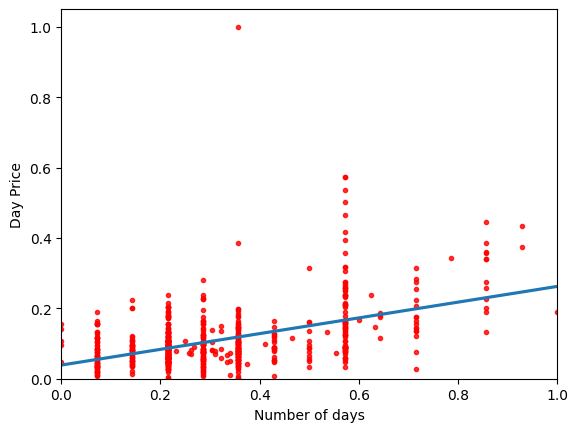

In [ ]:
#modelin görsel olarak ifade edilmesi
g = sns.regplot(x=data["Number of days"], y=data["Day price"], ci=None, scatter_kws={'color':'r', 's':9})


g.set_ylabel("Day Price")
g.set_xlabel("Number of days")
import matplotlib.pyplot as plt
plt.xlim(0,1)
plt.ylim(bottom=0);

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[["Number of days"]]
y = data["Price"]
reg = LinearRegression()
model = reg.fit(X, y)
model.predict([[30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.48949975])

In [ ]:
#karşılaştırma tablosu
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": model.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,0.255574,0.271538
1,0.146959,0.271538
2,0.155405,0.271538
3,0.197635,0.271538
4,0.070946,0.062582
5,0.113176,0.146165
6,0.054054,0.146165
7,0.070946,0.104374
8,0.062500,0.062582
9,0.096284,0.104374


In [ ]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,0.255574,0.271538,-0.015964
1,0.146959,0.271538,-0.124579
2,0.155405,0.271538,-0.116133
3,0.197635,0.271538,-0.073903
4,0.070946,0.062582,0.008364
5,0.113176,0.146165,-0.032989
6,0.054054,0.146165,-0.092111
7,0.070946,0.104374,-0.033428
8,0.062500,0.062582,-0.000082
9,0.096284,0.104374,-0.008090


In [ ]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,0.255574,0.271538,-0.015964,2.548451e-04
1,0.146959,0.271538,-0.124579,1.551986e-02
2,0.155405,0.271538,-0.116133,1.348682e-02
3,0.197635,0.271538,-0.073903,5.461662e-03
4,0.070946,0.062582,0.008364,6.994975e-05
5,0.113176,0.146165,-0.032989,1.088275e-03
6,0.054054,0.146165,-0.092111,8.484369e-03
7,0.070946,0.104374,-0.033428,1.117403e-03
8,0.062500,0.062582,-0.000082,6.781418e-09
9,0.096284,0.104374,-0.008090,6.544380e-05


In [ ]:
#toplam hata
np.sum(k_t["hata_kare"])

0.045548639130543564

In [ ]:
#hata kareler ortalaması
np.mean(k_t["hata_kare"])

0.004554863913054356

In [ ]:
#hata kareler ortalamasının karekoku
np.sqrt(np.mean(k_t["hata_kare"]))

0.0674897319083011

0   -0.015964
1   -0.124579
2   -0.116133
3   -0.073903
4    0.008364
5   -0.032989
6   -0.092111
7   -0.033428
8   -0.000082
9   -0.008090
Name: Price, dtype: float64


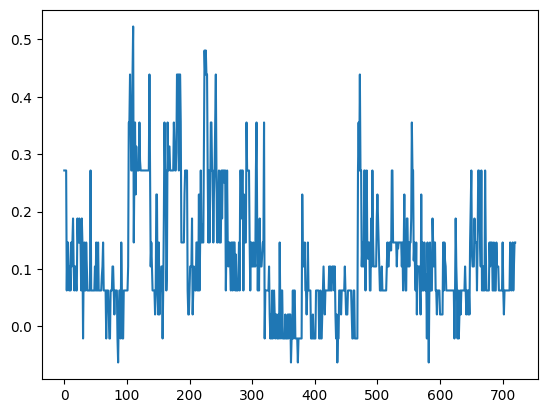

In [ ]:
#artıkların görselleştirilmesi
#bu hatalar verisetindeki aykırı değerlerden mi kaynaklanıyor gibi soruların sorulabileceği
#ve bu sorulara yanıt aramaya bizi sevk edecek gözlemler
predictions = model.predict(X)
residuals = y - predictions
print(residuals[:10])
plt.plot(predictions)

# Çoklu Doğrusal Regresyon

Çoklu Doğrusal Regresyon (Multiple Linear Regression), bir bağımlı değişkenin birden fazla bağımsız değişken tarafından tahmin edildiği bir regresyon analizi tekniğidir. Bu teknik, bağımlı değişken ile bir veya daha fazla bağımsız değişken arasındaki ilişkiyi modellemek için kullanılır.

 Model Tuning

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:

X = data.drop('Price', axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=90)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

Bu kod, veri setindeki bağımlı değişkeni (Price) ve bağımsız değişkenleri (diğer tüm sütunlar) ayırır. Daha sonra, veri setini eğitim ve test setlerine ayırır. Eğitim seti, modelin eğitildiği veri kümesidir ve test seti, modelin performansını değerlendirmek için kullanılan ayrı bir veri kümesidir.

In [ ]:
rmseTrain=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(rmseTrain)
rmseTest=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(rmseTest)
model.score(X_train, y_train)

0.03027180310983593
0.03139818158410153


0.9536973312597612

In [ ]:
#eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.9334987924497049

CV, veri setini eğitim ve test setlerine ayırma işlemini tekrarlayarak modelin performansını değerlendirir. Her tekrarda, veri seti farklı bir şekilde bölünür ve model eğitilir ve test edilir. Bu şekilde, her bir veri noktası hem eğitim hem de test setlerinde en az bir kez kullanılır.

In [ ]:
#neg_mean_squared_error'da sonuc negatif olacağı için üstte (-) ile çarpıyoruz
rmseTrain=np.sqrt(-cross_val_score(model,
                X_train,
                y_train,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()
print(rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model,
                X_test,
                y_test,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()
print(rmseTest)

0.031118938573245596
0.03558514547549284


In [ ]:
# 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

best_cv_score = max(cv_scores)
best_cv_index = np.argmax(cv_scores)

# Sonuçları yazdır
print("Cross-Validation MSE Scores:", -cv_scores)
print("Best Cross-Validation Score (MSE):", -best_cv_score)
print("Best Cross-Validation Fold Index:", best_cv_index)

Cross-Validation MSE Scores: [0.00079263 0.00653784 0.00082763 0.00081217 0.00059653]
Best Cross-Validation Score (MSE): 0.0005965335461176158
Best Cross-Validation Fold Index: 4


In [ ]:
# 10-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

best_cv_score = max(cv_scores)
best_cv_index = np.argmax(cv_scores)

# Sonuçları yazdır
print("Cross-Validation MSE Scores:", -cv_scores)
print("Best Cross-Validation Score (MSE):", -best_cv_score)
print("Best Cross-Validation Fold Index:", best_cv_index)

Cross-Validation MSE Scores: [0.00066487 0.00144304 0.0025399  0.00652844 0.00058184 0.0008669
 0.00095969 0.00049739 0.00044906 0.00055651]
Best Cross-Validation Score (MSE): 0.00044906309782953606
Best Cross-Validation Fold Index: 8


In [ ]:
# 100-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')

best_cv_score = max(cv_scores)
best_cv_index = np.argmax(cv_scores)

# Sonuçları yazdır
print("Cross-Validation MSE Scores:", -cv_scores)
print("Best Cross-Validation Score (MSE):", -best_cv_score)
print("Best Cross-Validation Fold Index:", best_cv_index)


Cross-Validation MSE Scores: [1.41497033e-03 2.38170669e-04 2.76454532e-04 2.79028874e-04
 2.60290267e-04 4.17040919e-04 1.10104109e-04 5.78934464e-05
 4.35095271e-04 5.93156202e-04 3.28991135e-04 1.44624865e-03
 2.83037153e-04 1.04216907e-03 1.84575867e-04 9.39459964e-05
 8.41757495e-04 7.00109437e-04 5.10421717e-04 7.36170553e-04
 2.62560957e-03 3.83268752e-03 3.10704178e-03 9.83324129e-03
 2.46555192e-04 1.88090686e-04 6.04361284e-05 3.83096770e-04
 5.03195918e-04 4.70251536e-02 3.09887897e-03 7.28238014e-03
 7.29241706e-04 4.57395849e-04 3.57371831e-04 3.29406704e-04
 1.04079602e-04 8.52910749e-04 3.34244279e-04 4.88866552e-04
 5.23614004e-04 5.59550087e-04 3.21861319e-04 7.18625759e-05
 5.39273236e-04 8.98404766e-04 2.29673881e-04 1.17845984e-03
 8.71405601e-04 2.90464844e-04 9.87498492e-04 1.22716230e-03
 4.01159133e-04 1.87577514e-03 7.38932432e-04 7.88571336e-04
 2.72294546e-04 7.71461313e-04 5.50632526e-04 1.81239089e-03
 7.73572346e-05 1.37481442e-04 1.77635910e-03 2.35975863

# PCR (Temel Bileşen Regresyonu - Principal Component Regression)

PCR, çoklu doğrusal regresyon modelinin performansını artırmak için temel bileşen analizi (PCA) kullanarak değişken seçimi yapar.

Temel bileşen analizi, çoklu değişkenli veri setindeki değişkenler arasındaki ilişkileri özetlemek ve veri boyutunu azaltmak için kullanılan bir yöntemdir. PCR, temel bileşen analizi kullanarak bağımsız değişkenler arasındaki çoklu doğrusallığı azaltır ve modelin aşırı uyuma eğilimini azaltır.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = data.copy()
print("training", training.shape)

X_train (540, 9)
y_train (540,)
X_test (181, 9)
y_test (181,)
training (721, 10)


Bu kod, veri setinin eğitim ve test veri setlerine nasıl bölündüğünü ve bu veri kümelerinin boyutlarını kontrol etmek için kullanılır. Ayrıca, orijinal veri setinin kopyası oluşturularak kopyanın boyutu da kontrol edilir.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
#indirgenmiş veriseti (transform indirgeme islemi)(scale islemi veri standardizasyonu yapmayi saglar)

X_reduced_train = pca.fit_transform(scale(X_train))
#ilk gözlemin tüm bileşenlerde incelenmesi
X_reduced_train[0:1,:]
#Normalde PCA n_components yani bileşen sayısı parametresini alır. Eğer parametreyi vermezsek bütün bileşenleri kullanır.

array([[-0.23964286, -1.27976037, -0.64228215, -0.29654758,  0.63983405,
         0.07023283, -0.45302874, -0.30641717, -0.6023662 ]])

In [ ]:
#açıklanan varyans oranı
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
#1. bilesen verisetindeki varyansın %38ini ifade ettiğini belirtir.
#2. bileşenin kendinden önceki bileşenle birlikte verisetindeki varyansın %59unu ifade ettiğini belirtir.
#3. bileşenin kendinden önceki bileşenlerle birlikte verisetindeki varyansın %70unu ifade ettiğini belirtir.
#...

#burada 10 bileşenle verisetindeki varyansın %97'sini ifade edebiliyoruz.

array([ 30.73,  49.2 ,  61.16,  72.39,  82.41,  89.  ,  94.44,  98.48,
       100.  ])

In [ ]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

0.11982163413413413
[ 6.74833229e-02  3.47384919e-02 -4.03187020e-05  5.35430764e-03
  1.86207917e-02 -1.31123440e-03  5.94831854e-02  5.58913843e-02
 -1.08717350e-02]


### Tahmin

In [ ]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([0.0319281 , 0.17251849, 0.04272041, 0.23253613, 0.00942129])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

0.031616692593607866

In [ ]:
r2_score(y_train, y_pred)

0.9469077779320653

In [ ]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.08154275610873536

### Model Tuning

In [ ]:
lm = LinearRegression()
#tüm bileşenlerle ile deneyelim
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.08154275610873536


In [ ]:
lm = LinearRegression()
#15 bileşenle ile bir deneyelim
pcr_model = lm.fit(X_reduced_train[:,0:15], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:15])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.08154275610873536


In [ ]:
#cross validation sayesinde olası bileşen sayılarıni gonderip optimum bileşen sayısını belirleyebiliriz
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
lm = LinearRegression()
RMSE = []


for i in np.arange(1, X_reduced_train.shape[1] + 1):

    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv=cv_10,
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

Bu kod, çapraz doğrulama (cross-validation) kullanarak farklı bileşen sayılarını deneyerek optimal bileşen sayısını belirlemeyi amaçlar. PCR modelinde kaç bileşen kullanılacağını belirlemek için yaygın bir yaklaşım olan bu süreç, modelin karmaşıklığını kontrol etmeye ve aşırı uyumu (overfitting) önlemeye yardımcı olur.

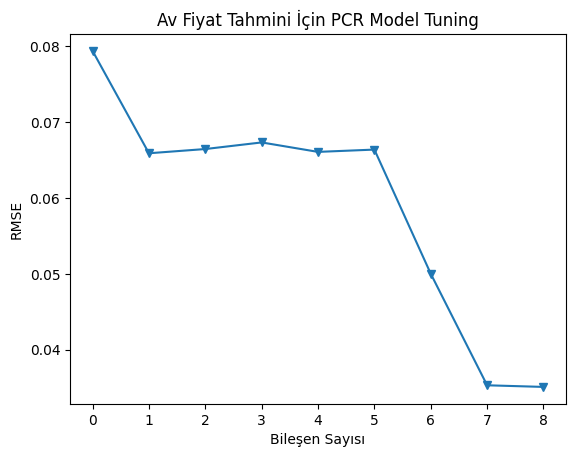

In [ ]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Av Fiyat Tahmini İçin PCR Model Tuning');

Grafikten de anlaşılacağı üzere bileşen sayısını 8 seçmek en düşük hataya erişmemizi sağlayacaktır.

In [ ]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:8])
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = pcr_model.predict(X_reduced_test[:,0:8])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

ValueError: X has 8 features, but LinearRegression is expecting 6 features as input.

# PLS  (Kısmi En Küçük Kareler Regresyonu)

PLS, temel bileşen regresyonu (PCR) gibi çoklu doğrusal regresyon yöntemlerinden biridir ve genellikle çoklu doğrusallık sorununu ele almak için kullanılır.

PLS, bağımsız değişkenler arasındaki çoklu doğrusallığı azaltmak ve bağımlı değişkenle olan ilişkiyi yakalamak için bir dizi bileşen oluşturur. Bu bileşenler, hem bağımsız değişkenlerin varyansını açıklamak hem de bağımlı değişkenle olan korelasyonu maksimize etmek için seçilir.

PLS'nin PCR'den farkı, bileşenlerin seçiminde bağımlı değişkenle olan ilişkiye odaklanmasıdır. PCR'de bileşenler, bağımsız değişkenler arasındaki varyansı açıklamak için seçilirken, PLS'de bileşenler, bağımsız değişkenler arasındaki korelasyonu ve bağımlı değişkenle olan ilişkiyi maksimize etmek için seçilir.

PLS'nin avantajlarından biri, çoklu doğrusallık problemlerini ele alırken, aynı zamanda özellik seçimi ve boyut azaltma gibi diğer veri ön işleme tekniklerine ihtiyaç duymamasıdır. Bu nedenle, PLS genellikle değişken sayısının fazla olduğu durumlarda etkili bir regresyon yöntemi olarak tercih edilir.

### Model

In [ ]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
#tum bilesenler alindi
pls_model = PLSRegression().fit(X_train, y_train)
#3 bilesene indirgeyebiliriz ancak bu ara katmandaki PLS factor sayisini belirler, degisken sayisi gene aynidir.
#pls_model = PLSRegression(n_components=3).fit(X_train, y_train)
pls_model.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[0.07699394],
       [0.04581044],
       [0.01637382],
       [0.02244882],
       [0.00964835],
       [0.00124859],
       [0.00303963],
       [0.00907688],
       [0.00953135]])

### Tahmin

In [ ]:
X_train.head()

,Day price,Number of days,Latitude,Species_Thinhorn Sheep,Species_Polar Bear,S Rank_S5,Status,Classification_Ungulate,Province/State_Alberta
711,0.059730,0.214286,0.276912,0,0,0,0.75,1,0
254,0.089595,0.571429,0.422128,0,0,0,0.50,1,0
61,0.054713,0.285714,0.631456,0,0,1,1.00,0,0
192,0.161988,0.500000,0.631456,0,0,0,0.75,1,0
412,0.058296,0.142857,0.283367,0,0,1,1.00,1,0


In [ ]:
pls_model.predict(X_train)

array([[ 3.08729600e-02],
       [ 1.58311608e-01],
       [ 5.25258256e-02],
       [ 2.24955876e-01],
       [ 1.75091192e-02],
       [ 7.08531145e-02],
       [ 6.05776069e-02],
       [ 1.15928459e-01],
       [ 3.35085224e-02],
       [ 2.41755759e-02],
       [ 6.66050213e-01],
       [ 5.78090988e-02],
       [ 8.16207312e-02],
       [ 1.30984723e-01],
       [ 2.44356646e-02],
       [-1.90840551e-02],
       [ 8.66294241e-03],
       [ 1.71921266e-02],
       [ 4.58451885e-02],
       [-2.27694995e-02],
       [ 4.33244893e-01],
       [ 2.07234282e-01],
       [ 5.13370869e-02],
       [ 6.24605893e-02],
       [ 8.60077906e-02],
       [ 4.97171964e-01],
       [ 6.49427949e-02],
       [ 1.40092148e-02],
       [ 8.90489162e-02],
       [ 1.31847251e-01],
       [ 6.72419003e-02],
       [ 6.75985471e-02],
       [ 1.78255668e-01],
       [ 7.36625161e-02],
       [ 2.83190577e-02],
       [ 6.50276742e-02],
       [ 3.28743798e-01],
       [ 2.14047216e-01],
       [ 3.5

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.04223882802327993

In [ ]:
r2_score(y_train, y_pred)

0.9052407208968883

In [ ]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


Model Tuning

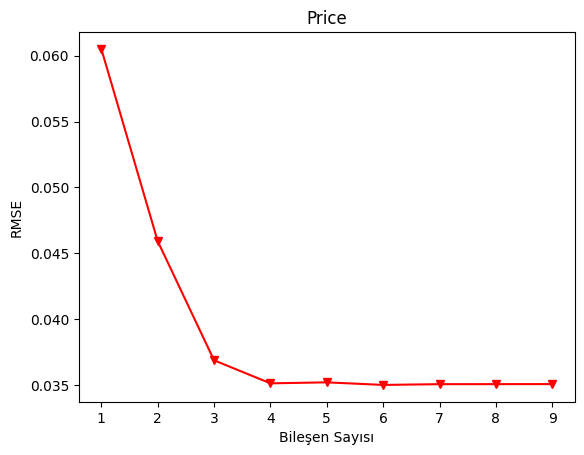

In [ ]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Price');

In [ ]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.03576711383626269

# Ridge Regresyon

Ridge regresyon, çoklu doğrusal regresyon modelinin bir türüdür ve aşırı uyumu (overfitting) azaltmak için kullanılır. Ridge regresyon, L2 düzenleme yöntemini kullanarak model karmaşıklığını kontrol eder.

Ridge regresyonunun amacı, modelin katsayılarının büyüklüğünü sınırlamak ve böylece modelin karmaşıklığını azaltmaktır.

### Model

In [ ]:
from sklearn.linear_model import Ridge
#alpha=lambda
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_

array([ 1.11508883,  0.33556801, -0.03405804,  0.05826288,  0.07755099,
       -0.00561297,  0.02934834, -0.00227608,  0.02071308])

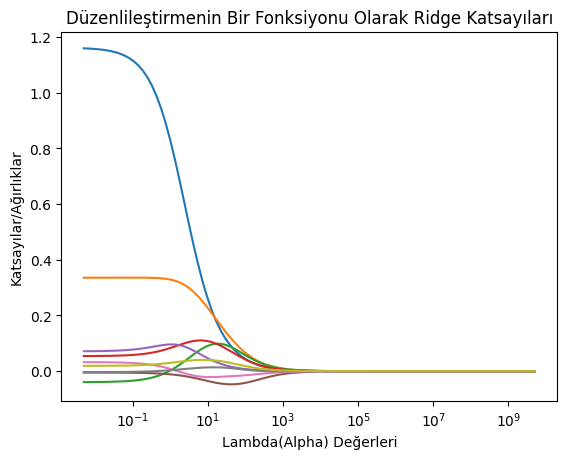

In [ ]:
#belirlenen aralıkta lambda değerleri oluşturuyoruz
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)


import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

### Tahmin

In [ ]:
y_pred = ridge_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

0.027029545384052472

### Model Tuning

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [ ]:
lambdalar[0:5]


array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar,
                   scoring = "neg_mean_squared_error",
                   )

In [ ]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [ ]:
#optimum lambda değerini bulduk
ridge_cv.alpha_

0.06164233697210317

In [ ]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_,
                   ).fit(X_train,y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

0.027108046076218466

# Lasso Regresyon


Lasso regresyon, Lineer Regresyon modelinin bir türüdür ve özellik seçimi ve boyut azaltma için kullanılır. "Lasso" terimi, "Least Absolute Shrinkage and Selection Operator" kelimelerinin baş harflerinden oluşur.

Lasso regresyonu, regresyon katsayılarını sıfıra yaklaştırarak ve bazı katsayıları tamamen sıfır yaparak model karmaşıklığını azaltır. Bu nedenle, lasso regresyonu hem bir düzenleme tekniği olarak hem de özellik seçimi aracı olarak işlev görür.

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [ ]:
lasso_model.coef_

array([ 0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.])

Daha önceden lasso regresyonu yapıldığından  özelliklerin birbirleriyle yüksek derecede korelasyonlu olması dizinin 0 olmasına neden oldu.

Text(0, 0.5, 'weights')

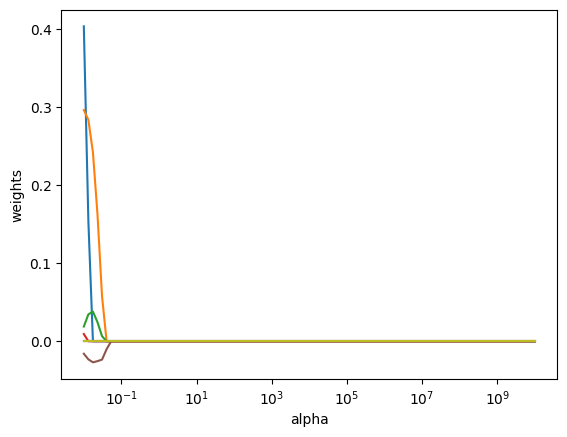

In [ ]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)

import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# ElasticNet (eNet) Regresyonu


ElasticNet (eNet) Regresyonu, Lasso regresyonu ve Ridge regresyonu yöntemlerini birleştiren bir regresyon yöntemidir. ElasticNet, hem L1 (Lasso) hem de L2 (Ridge) düzenleme terimlerini içerir ve bu nedenle her iki yöntemin avantajlarını bir araya getirir.

Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_

array([ 0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,
       -0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
       -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,
       -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
        0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.])

In [ ]:
enet_model.intercept_

0.11982163413413413

##Tahmin

In [ ]:
enet_model

ElasticNet()

In [ ]:
enet_model.predict(X_test)

array([0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982163,
       0.11982163, 0.11982163, 0.11982163, 0.11982163, 0.11982

In [ ]:
y_pred = enet_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.1461853794416045

In [ ]:
r2_score(y_test, y_pred)

-2.167685135612274e-06

###Model Tuning

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [ ]:
enet_cv_model.alpha_

5.89286901568706e-05

In [ ]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [ ]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [ ]:
y_pred = enet_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.023146475809466344

# Doğrusal Olmayan Regresyon

Doğrusal olmayan regresyon, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi açıklamak için doğrusal olmayan bir fonksiyon kullanılarak gerçekleştirilen bir regresyon türüdür. Doğrusal olmayan regresyon, bağımlı değişkenin ve bağımsız değişkenlerin karmaşıklığına ve doğasına daha iyi uyum sağlayabilen modeller oluşturur.

Doğrusal regresyon, bağımsız değişkenler ile bağımlı değişken arasındaki ilişkiyi doğrusal bir fonksiyonla ifade etmeye dayanır. Ancak, gerçek dünya verileri genellikle doğrusallıktan uzaktır ve bu nedenle doğrusal regresyon bazı durumlarda yetersiz kalabilir. Doğrusal olmayan regresyon yöntemleri, veri setlerinin karmaşıklığına daha iyi uyum sağlayabilir ve daha doğru tahminler yapabilir.

In [ ]:
!pip install skompiler
!pip install astor
!pip install xgboost
!pip install catboost
!pip install lightgbm
#conda install -c conda-forge lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54310 sha256=01e905a4258691bc368bbb4ee78851b139115b270b45f062aeadcc4b59fe59b8
  Stored in directory: /root/.cache/pip/wheels/c0/22/3d/bd8fd4c6cd205cf122a0974be908681472a6f44abd6b880614
Successfully built skompiler


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler


from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor

from warnings import filterwarnings
filterwarnings('ignore')

from datetime import datetime

In [ ]:
help(KNeighborsRegressor)
?KNeighborsRegressor

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
knn_model

KNeighborsRegressor()

In [ ]:
knn_model.n_neighbors #default değeri 5

5

In [ ]:
knn_model.effective_metric_

'euclidean'

In [ ]:
y_pred = knn_model.predict(X_test)

print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = []
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k =" , k , "için RMSE değeri: ", rmse)

test hatası: 0.057091852167164024
k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.02312601531691795
k = 3 için RMSE değeri:  0.030612596826017743
k = 4 için RMSE değeri:  0.03755144651635077
k = 5 için RMSE değeri:  0.04333141469371051
k = 6 için RMSE değeri:  0.04881062901526892
k = 7 için RMSE değeri:  0.05490024672653169
k = 8 için RMSE değeri:  0.05935739792282874
k = 9 için RMSE değeri:  0.06391346567060649
k = 10 için RMSE değeri:  0.06922202510446357


## Model Tuning

In [ ]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

2

In [ ]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 100)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=100, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

5

In [ ]:
RMSE = []
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10,
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse)
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  0.04652309232076204
k = 2 için RMSE değeri:  0.02312601531691795 RMSE_CV değeri:  0.04746300906825458
k = 3 için RMSE değeri:  0.030612596826017743 RMSE_CV değeri:  0.05112017835363386
k = 4 için RMSE değeri:  0.03755144651635077 RMSE_CV değeri:  0.05454712445309903
k = 5 için RMSE değeri:  0.04333141469371051 RMSE_CV değeri:  0.06037666023953484
k = 6 için RMSE değeri:  0.04881062901526892 RMSE_CV değeri:  0.06565037830938315
k = 7 için RMSE değeri:  0.05490024672653169 RMSE_CV değeri:  0.07074379009565927
k = 8 için RMSE değeri:  0.05935739792282874 RMSE_CV değeri:  0.07478563804495397
k = 9 için RMSE değeri:  0.06391346567060649 RMSE_CV değeri:  0.0800944768920225
k = 10 için RMSE değeri:  0.06922202510446357 RMSE_CV değeri:  0.08552343771144305


In [ ]:
#k=2 için train degil test setini denediğimizde
knn_tuned = KNeighborsRegressor(n_neighbors =2)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.04052807744720156

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.057091852167164024

# Destek Vektör Regresyonu (SVR)

Özellikle sayısal tahminler gerektiren durumlarda ve veri seti karmaşık bir yapıya sahip olduğunda etkilidir. SVR, hem doğrusal hem de doğrusal olmayan regresyon problemlerini çözebilir ve çoklu doğrusallık gibi sorunlarla başa çıkabilir.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:

X_train = pd.DataFrame(X_train["Day price"])
X_test = pd.DataFrame(X_test["Day price"])
svr_model = LinearSVR().fit(X_train, y_train)

In [ ]:
svr_model.predict(X_train)[0:5]
#ilk değer için modelimizi deneyebiliriz

array([0.04854082, 0.08478192, 0.04245232, 0.17263032, 0.04680125])

In [ ]:
#dogrusal modelimizin parametre katsayilari
print ("y = {0} + {1} x".format(svr_model.intercept_[0],
                                svr_model.coef_[0]))

y = -0.0239413577078087 + 1.2134966990276732 x


In [ ]:
X_train["Day price"][0:1]

711    0.05973
Name: Day price, dtype: float64

In [ ]:
#değerleri formulde yerine yazip sonucu aldigimizda dogru y degerine ulastigimizi goruyoruz.
-0.0239413577078087 + 1.2134966990276732 *0.05973

0.04854080012511422

In [ ]:
y_pred = svr_model.predict(X_train)

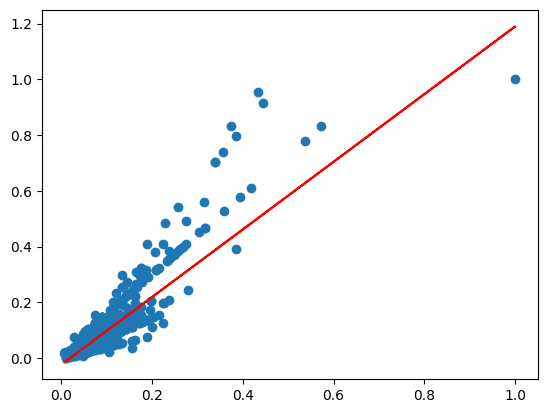

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [ ]:
#lineer regresyon modeliyle svm modelini karsilastiralim
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -0.042975365701400065 + 1.4934900164521006 x


In [ ]:
-0.042975365701400065 + 1.4934900164521006*0.05973

0.046230792981283894

Text(0, 0.5, 'Değer (Price)')

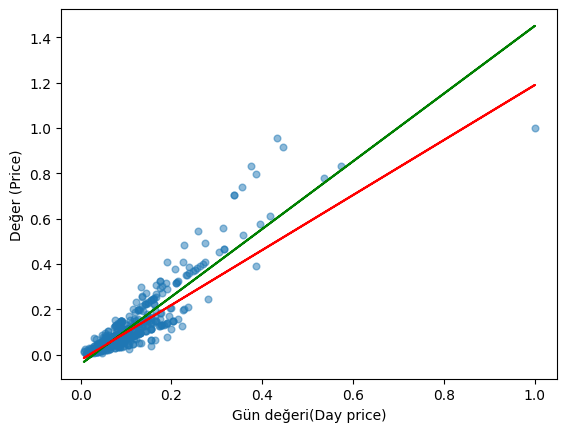

In [ ]:
#iki yontemi de gorsel olarak karsilastiralim
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Gün değeri(Day price)")
plt.ylabel("Değer (Price)")

**Not:** Yukarıdaki grafik gözlemlendiğinde,

lineer regresyon yöntemiyle elde edilen doğru (yeşil) day price'a göre daha değer biçme  eğilimindedir. bunun sebebi grafiğin üstünde görülen aykırı değerlerin lineer modelin tahminini yukarı çekmesidir.

SVR'de ise (robust bir yontem oldugundan) aykırı gözlemlerin etkisi daha düşüktür.

## Tahmin (Doğrusal SVR)

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0]))

y = -0.0239413577078087 + 1.2134966990276732 x


In [ ]:
svr_model.predict([[0.05973]])

array([0.0485408])

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.067964247406357

## Model Tuning (Doğrusal SVR)

In [ ]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

1.9000000000000001

In [ ]:
svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.06744011370786318

In [ ]:
svr_model = LinearSVR().fit(X_train, y_train)
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

print(pd.Series(svr_cv_model.best_params_)[0])

svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

1.8000000000000003


0.06717773919992966

cv=100 için

In [ ]:
svr_model = LinearSVR().fit(X_train, y_train)
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 100).fit(X_train,y_train)

print(pd.Series(svr_cv_model.best_params_)[0])

svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

0.1


0.08455003864422919

In [ ]:
svr_model.intercept_

array([-0.02363194])

In [ ]:
svr_model.coef_

array([1.20946202])

### Model (Doğrusal Olmayan SVR)

In [ ]:
#bir veriseti olusturup lineer regresyon ile SVR'yi gorsel olarak karsilastiralim
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)
#aykırı gözlemler
x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [ ]:
#lineer regresyon
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

#SVR
eps = 0.1 #default degeri
#rbf=radial bases function (dogrusal olmayan bir form)
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

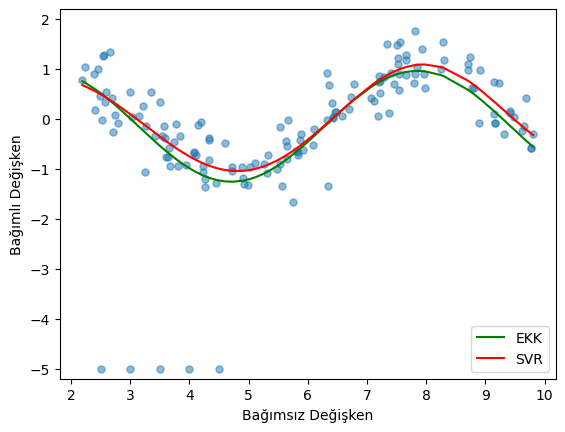

In [ ]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

Grafikte sol altta eklenen aykırı değerlere dikkat edin. onceki bolumde oldugu gibi En Kucuk  Kareler yontemini kullanan lineer regresyon yonteminin egrisini asagi cektigini gozlemleyebilirsiniz.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

### Tahmin (Doğrusal Olmayan SVR)

In [ ]:
y_pred = svr_rbf.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.06883529252396249

## Model Tuning (Doğrusal Olmayan SVR)

In [ ]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50, 60, 70,
                               80, 90, 100, 110, 120, 130, 140, 200, 300, 400,
                               500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, ...]})

In [ ]:
svr_cv_model.best_params_

{'C': 0.4}

In [ ]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,
                                                                        y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

0.06899382637549792

# Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)

Çok Katmanlı Algılayıcı (ÇKA), yapay sinir ağları (YSA) sınıfına ait bir tür yapay sinir ağıdır. İnsan beyninin çalışma prensiplerinden esinlenen ÇKA, karmaşık yapıları ve desenleri tanımak ve tahmin etmek için kullanılan bir makine öğrenimi algoritmasıdır.

ÇKA, birden fazla katman içeren bir yapay sinir ağıdır. Giriş katmanı, gizli katman(lar) ve çıkış katmanı olmak üzere üç veya daha fazla katmandan oluşur. Her katman, bir veya daha fazla yapay nöron veya düğümden oluşur.

Her nöron, giriş verilerinden öğrenilmiş ağırlıkları kullanarak bir çıkış üretir. Bu çıkışlar, bir sonraki katmanın nöronlarına giriş olarak kullanılır. Her katmandaki nöronlar, giriş verilerinin birleşik bir temsilini oluşturmak için belirli bir aktivasyon fonksiyonu ile ağırlıklı toplamları işler.

ÇKA'nın temel özelliği, veri içindeki karmaşık ilişkileri modelleyebilme yeteneğidir. ÇKA, özellikle büyük ve karmaşık veri setlerinde, desen tanıma, sınıflandırma, regresyon ve öngörü gibi birçok farklı görevde kullanılabilir.

In [ ]:
from sklearn.neural_network import MLPRegressor


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(mlp_model)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

MLPRegressor(hidden_layer_sizes=(100, 20))
4
(100, 20)


### Tahmin

In [ ]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

0.11566783736930523

### Model Tuning

In [ ]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [ ]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [ ]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (300, 200, 150)}

In [ ]:
mlp_tuned = MLPRegressor(activation=mlp_cv_model.best_params_['activation'],
                         alpha = mlp_cv_model.best_params_['alpha'],
                         hidden_layer_sizes = mlp_cv_model.best_params_['hidden_layer_sizes'])
print(mlp_tuned)
print(mlp_tuned.activation)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(300, 200, 150))
relu


In [ ]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(300, 200, 150))

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

0.006793191683254133

# Karar Ağaçları / Classification and Regression Trees (CART)

Regresyon ağaçları, regresyon problemlerini çözmek için kullanılır. Bu algoritma, bağımlı değişkenin sürekli bir değerini tahmin etmek için bir dizi karar kuralı kullanır. Her bir düğüm, bir özelliği ve bir eşik değerini kullanarak veri kümesini ikiye böler. Bu bölmeler, veri setindeki varyansı (hedef değişkenin değişkenliği) minimize etmek veya ortalama kare hatayı minimize etmek için optimize edilir.

## Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
#tek bir bagimsiz degiskenle deneyelim
X_train = pd.DataFrame(X_train["Number of days"])
X_test = pd.DataFrame(X_test["Number of days"])

In [ ]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

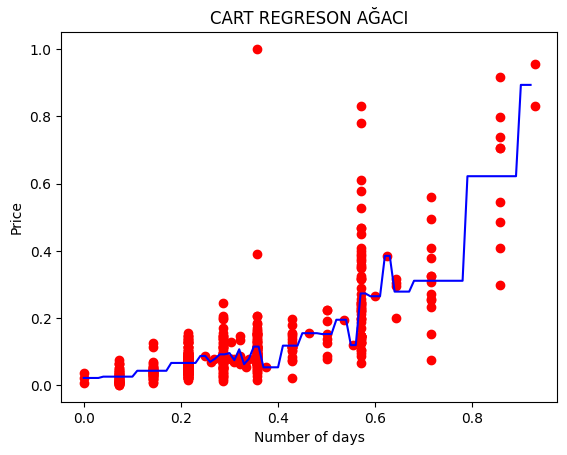

In [ ]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Number of days')
plt.ylabel('Price') ;

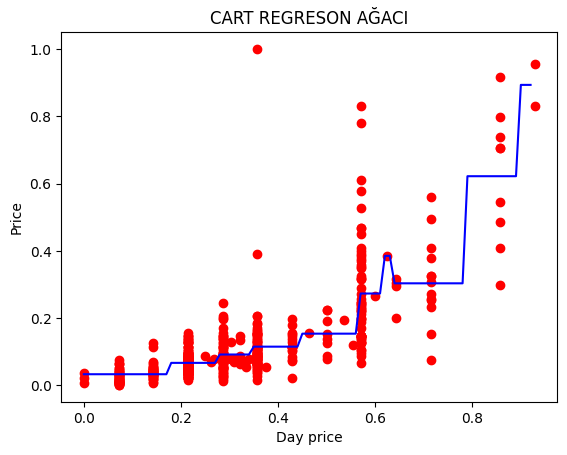

In [ ]:
#farklı parametrelerle deneyelim
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)
cart_model.fit(X_train, y_train)
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Day price')
plt.ylabel('Price') ;

In [ ]:
#skompiler kutuphanesi ile karar agacinin karar modelini python koduna ceviriyoruz
print(skompile(cart_model.predict).to('python/code'))

(((0.03346283783783783 if x[0] <= 0.1785714328289032 else 
    0.06720854487083773) if x[0] <= 0.2767857164144516 else 
    0.09206126734842948 if x[0] <= 0.3482142835855484 else 
    0.11537210888773392 if x[0] <= 0.4464285671710968 else 
    0.1540033783783784) if x[0] <= 0.5625 else (0.2732483108108109 if x[0] <=
    0.612500011920929 else 0.3851351351351351 if x[0] <= 0.6339285671710968
     else 0.30356319554848965) if x[0] <= 0.7857142984867096 else 
    0.6218093093093093 if x[0] <= 0.8928571343421936 else 0.893141891891892)



## Tahmin

In [ ]:
x = [91]

In [ ]:
(((0.03346283783783783 if x[0] <= 0.1785714328289032 else
    0.06720854487083773) if x[0] <= 0.2767857164144516 else
    0.09206126734842948 if x[0] <= 0.3482142835855484 else
    0.11537210888773392 if x[0] <= 0.4464285671710968 else
    0.1540033783783784) if x[0] <= 0.5625 else (0.2732483108108109 if x[0] <=
    0.612500011920929 else 0.3851351351351351 if x[0] <= 0.6339285671710968
     else 0.30356319554848965) if x[0] <= 0.7857142984867096 else
    0.6218093093093093 if x[0] <= 0.8928571343421936 else 0.893141891891892)

0.893141891891892

In [ ]:
x = [0.25]

In [ ]:
(((0.03346283783783783 if x[0] <= 0.1785714328289032 else
    0.06720854487083773) if x[0] <= 0.2767857164144516 else
    0.09206126734842948 if x[0] <= 0.3482142835855484 else
    0.11537210888773392 if x[0] <= 0.4464285671710968 else
    0.1540033783783784) if x[0] <= 0.5625 else (0.2732483108108109 if x[0] <=
    0.612500011920929 else 0.3851351351351351 if x[0] <= 0.6339285671710968
     else 0.30356319554848965) if x[0] <= 0.7857142984867096 else
    0.6218093093093093 if x[0] <= 0.8928571343421936 else 0.893141891891892)

0.06720854487083773

In [ ]:
X_test[0:5]

,Number of days
259,0.357143
658,0.357143
77,0.285714
65,0.214286
81,0.214286


In [ ]:
cart_model.predict(X_test)[0:5]

array([0.11537211, 0.11537211, 0.09206127, 0.06720854, 0.06720854])

In [ ]:
cart_model.predict([[0.32]])

array([0.09206127])

In [ ]:
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.09465262557029419

## Model Tuning

In [ ]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.09421980955700068

In [ ]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [ ]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [ ]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 2}

In [ ]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [ ]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [ ]:
y_pred = cart_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.09036134944939014

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)
#ilkel test hatasina bir bakalim
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

#cross validation
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 100)
cart_cv_model.fit(X_train, y_train)
print(cart_cv_model.best_params_)
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = cart_cv_model.best_params_['max_leaf_nodes'],
                                   min_samples_split = cart_cv_model.best_params_['min_samples_split'])
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.01639943048280944
{'max_leaf_nodes': 9, 'min_samples_split': 21}
0.04015817121180844


# Bagged Trees Regresyon
Temeli, Boostrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.


Bagged Trees, ağaç tabanlı bir regresyon modelleme tekniğidir ve "Bootstrap Aggregating" (Bagging) adı verilen bir topluluk öğrenme yöntemini kullanır. Bu yöntem, ağaçların birçok kopyasını oluşturarak ve her kopyayı rastgele bir alt örneklem (Bootstrap) üzerinde eğiterek çalışır. Daha sonra, bu ağaçların tahminlerinin ortalamasını alarak ya da çoğunluk oyu yöntemiyle (sınıflandırma için) veya ortalama (regresyon için) bir tahmin yapılır.

Bagged Trees, özellikle tek bir ağaçtan daha karmaşık bir model oluşturmak ve varyansı azaltmak için kullanılır. Her bir ağaç, alt örneklemdeki farklı örneklerle eğitildiği için, farklı öğrenme hatalarına sahip olur. Bu nedenle, Bagged Trees, ağaçların birleştirilmesiyle daha dengeli ve güvenilir tahminler yapabilir.

### Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
#bootstrap_features default degeri false, bootstrap orneklerini gozlemlemek icin true verdik
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [ ]:
#tahminci sayisi
bag_model.n_estimators

10

In [ ]:
#10 adet agac
bag_model.estimators_

[DecisionTreeRegressor(random_state=610347738),
 DecisionTreeRegressor(random_state=1345981792),
 DecisionTreeRegressor(random_state=586852157),
 DecisionTreeRegressor(random_state=2069355299),
 DecisionTreeRegressor(random_state=752020837),
 DecisionTreeRegressor(random_state=42911419),
 DecisionTreeRegressor(random_state=1328795665),
 DecisionTreeRegressor(random_state=1567387347),
 DecisionTreeRegressor(random_state=271022724),
 DecisionTreeRegressor(random_state=781920573)]

In [ ]:
#her bir agacin ornekleri
bag_model.estimators_samples_

[array([368, 122, 115,  13, 447, 292, 366, 537, 366, 441,  98, 517,  66,
         77, 409, 530, 117,  81, 481,  74,  57, 106, 387, 127, 213,  18,
        373, 334, 384, 530,  37, 112, 145, 527,  50, 340, 142,  53, 154,
        201, 226, 302,  53, 406, 169, 499, 252, 109,  13, 492, 201, 362,
        114,  69, 128, 160, 340, 280, 496,  91, 352, 254, 242, 255, 349,
         84, 327, 511, 490, 448, 242, 199, 496, 342, 378, 381, 165, 381,
        469, 124,  22,  10,  12, 390, 239, 118, 495,   1, 442, 242, 426,
        509, 172,   6, 372,  51, 337, 314, 444, 359, 511, 472, 245, 502,
        338, 459, 450, 340, 536, 328,   1, 157, 400, 242, 100,  88, 114,
        193, 229, 401, 240, 191, 486, 204, 107,  31,  25, 246,   7, 417,
        245, 431, 331,  22, 350, 480, 336, 156, 453, 305, 338, 498, 326,
        139, 477, 162, 107, 457, 479, 322, 364, 147, 315, 393, 316, 493,
        302, 394, 538, 231, 462, 318, 528,  76, 290,   4, 131, 228, 162,
        397, 513, 155,  11,  96,  93,  43, 216, 456

In [ ]:
#her agacin bagimsiz degiskenleri
bag_model.estimators_features_

[array([8, 0, 1, 3, 0, 6, 8, 7, 3]),
 array([0, 1, 8, 4, 7, 7, 3, 8, 8]),
 array([8, 2, 1, 8, 6, 6, 6, 4, 0]),
 array([3, 3, 8, 3, 2, 8, 3, 2, 7]),
 array([5, 1, 0, 8, 6, 7, 4, 1, 2]),
 array([4, 4, 8, 7, 2, 8, 4, 6, 5]),
 array([1, 6, 8, 5, 7, 3, 6, 1, 3]),
 array([3, 6, 1, 3, 6, 3, 7, 5, 0]),
 array([4, 0, 7, 2, 1, 4, 1, 1, 0]),
 array([7, 8, 7, 4, 1, 6, 6, 8, 7])]

### Tahmin

In [ ]:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.025548265350879566

In [ ]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

0.01701544745698495

In [ ]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

0.015232030324437503

### Model Tuning

In [ ]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [ ]:
bag_params = {"n_estimators": range(2,20)}

In [ ]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [ ]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [ ]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [ ]:
bag_cv_model.best_params_

{'n_estimators': 13}

In [ ]:
bag_tuned = BaggingRegressor( n_estimators = 13, random_state = 45)

In [ ]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=13, random_state=45)

In [ ]:
y_pred = bag_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.018385452353132787

# Random Forests
Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesidir.

Bagging (Breiman, 1996) ile Random Subspace (Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur.

Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir.

Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.

Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.

Her düğüm noktasında rastgele değişken seçimi yapılır. (regresyon'da p/3, sınıflama'da karekök p)

Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir.

### Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Tahmin

In [ ]:
rf_model.predict(X_test)[0:5]

array([0.18331267, 0.07924831, 0.05157179, 0.03674341, 0.04153716])

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.015559469115322196

### Model Tuning

In [ ]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                            n_jobs = -1)
# n_jobs = -1 yukarida yapılacak hesap sayisi her bir degerin kombinasyonu dusunuldugunde cok fazla olmaktadır.
#n_jobs parametresi islemcinin paralel yurutebilecegi islemleri ayni anda yurutmesini saglamaktadır.

In [ ]:
rf_cv_model.fit(X_train, y_train)
rf_cv_model.best_params_

KeyboardInterrupt: 

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 8,
                                 max_features = 3,
                                 n_estimators =200)

In [ ]:
rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#degiskenlerin onem duzeyine bir bakalim.
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

#Gradient Boosting Machines (GBM)
AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genellenmiş bir versiyonudur.

Adaptive Boosting (AdaBoost) zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması için geliştirilen bir yöntemdir.


• Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.

• Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/ hatalarının (residuals) üzerine kurularak (fit) oluşturulur.

• GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır.

• GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines,...)

• Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir.

• Boosting + Gradient Descent

### Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

### Tahmin

In [ ]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.011611032779896484

### Model Tuning

In [ ]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [ ]:
#algoritmanın calisma zamanina da bir bakalim
t1 =  datetime.now()
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


KeyboardInterrupt: 

In [ ]:
gbm_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                      max_depth = 100,
                                      n_estimators = 200,
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.009384191398672314

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

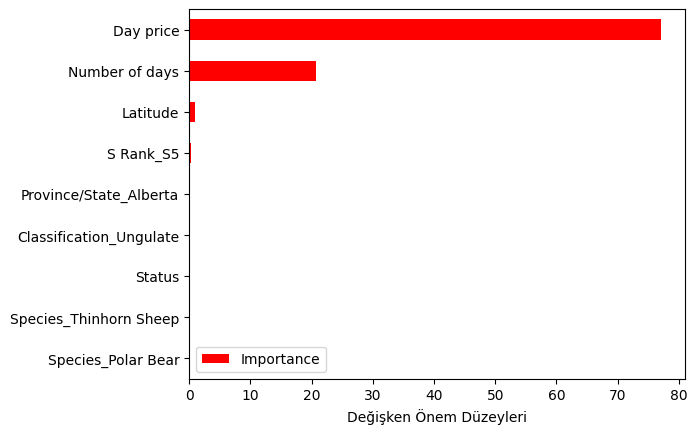

In [ ]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost (eXtreme Gradient Boosting)
XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
    
    R, Python, Hadoop, Scala, Julia ile kullanılabilir
    Ölçeklenebilir
    Hızlı
    Tahmin başarısı yüksek
    Birçok kaggle yarışmasında başarısını kanıtlamış.

### Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
#pandas ya da numpy yerine kendi dataframeini kullanırsaniz daha performanslı calıstigi soylenmis.
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
#pandas dataframei ile de kullanılabilir.
xgb_model = XGBRegressor().fit(X_train, y_train)

### Tahmin

In [ ]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.012344951526646317

### Model Tuning

In [ ]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [ ]:
t1 =  datetime.now()

xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb,
                      param_grid = xgb_grid,
                      cv = 10,
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


KeyboardInterrupt: 

In [ ]:
xgb_cv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.5,
                         learning_rate = 0.1,
                         max_depth = 2,
                         n_estimators = 500)

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.015492865941601593

#Light GBM
Light GBM, XGBoost'un eğitim süresini azaltmaya yönelik geliştirilmiş bir diğer GBM türüdür.

2017 yılında Microsoft tarafından geliştirilmiştir.

    Daha performanslıdır.
    Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi kullanır.
    Breadth-first search (BSF) yerine depth-first search (DFS) arama algoritmasını kullanır.

### Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 540, number of used features: 7
[LightGBM] [Info] Start training from score 0.119822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### Tahmin

In [ ]:
y_pred = lgbm_model.predict(X_test,
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.03504449715067987

### Model Tuning

In [ ]:
lgbm_model

LGBMRegressor()

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
t1 =  datetime.now()
lgbm_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


KeyboardInterrupt: 

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1,
                           max_depth = 6,
                           n_estimators = 20,
                          colsample_bytree = 0.5)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.04015817121180844

#CatBoost

Kategorik değişkenler ile otomatik olarak ücadele edebilen, hızlı, başarılı bir diğer GBM türevidir.
2017 yılında Yandex tarafından geliştirilmiştir.

    Kategorik değişken desteği vardır.
    Hızlı ve ölçeklenebilir GPU desteği vardır.
    Hızlı train ve hızlı tahmin yapar
    

### Model

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.037145
0:	learn: 0.1342147	total: 52.1ms	remaining: 52s
1:	learn: 0.1305544	total: 53ms	remaining: 26.5s
2:	learn: 0.1270408	total: 54ms	remaining: 17.9s
3:	learn: 0.1237714	total: 61.3ms	remaining: 15.3s
4:	learn: 0.1206399	total: 62.1ms	remaining: 12.3s
5:	learn: 0.1173896	total: 62.7ms	remaining: 10.4s
6:	learn: 0.1142129	total: 63.4ms	remaining: 8.99s
7:	learn: 0.1113682	total: 64ms	remaining: 7.93s
8:	learn: 0.1091708	total: 64.6ms	remaining: 7.12s
9:	learn: 0.1067804	total: 65.3ms	remaining: 6.46s
10:	learn: 0.1043619	total: 65.9ms	remaining: 5.93s
11:	learn: 0.1020156	total: 66.5ms	remaining: 5.47s
12:	learn: 0.0998645	total: 67.1ms	remaining: 5.1s
13:	learn: 0.0973509	total: 67.8ms	remaining: 4.77s
14:	learn: 0.0953493	total: 68.4ms	remaining: 4.49s
15:	learn: 0.0932392	total: 69.1ms	remaining: 4.25s
16:	learn: 0.0913556	total: 69.7ms	remaining: 4.03s
17:	learn: 0.0889509	total: 70.3ms	remaining: 3.84s
18:	learn: 0.0869124	total: 71.1ms	remaining: 3.67s
1

### Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.010727651558953982

### Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
t1 =  datetime.now()
catb_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 0.1325868	total: 1.61ms	remaining: 3.22s
1:	learn: 0.1281841	total: 2.11ms	remaining: 2.11s
2:	learn: 0.1237375	total: 2.47ms	remaining: 1.65s
3:	learn: 0.1198390	total: 4.25ms	remaining: 2.12s
4:	learn: 0.1158047	total: 6.36ms	remaining: 2.54s
5:	learn: 0.1121856	total: 6.94ms	remaining: 2.31s
6:	learn: 0.1089197	total: 7.58ms	remaining: 2.16s
7:	learn: 0.1056049	total: 8.22ms	remaining: 2.05s
8:	learn: 0.1024294	total: 8.89ms	remaining: 1.97s
9:	learn: 0.0993512	total: 9.7ms	remaining: 1.93s
10:	learn: 0.0969110	total: 10.3ms	remaining: 1.87s
11:	learn: 0.0938128	total: 11.1ms	remaining: 1.84s
12:	learn: 0.0911284	total: 12.1ms	remaining: 1.84s
13:	learn: 0.0884731	total: 12.6ms	remaining: 1.79s
14:	learn: 0.0861824	total: 13.3ms	remaining: 1.76s
15:	learn: 0.0837152	total: 14.1ms	remaining: 1.75s
16:	learn: 0.0813904	total: 14.8ms	remaining: 1.73s
17:	learn: 0.0790598	total: 15.5ms	remaining: 1.71s
18:	learn: 0.

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 1000,
                               learning_rate = 0.1,
                               depth = 5)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

NameError: name 'catb_tuned' is not defined

# **Modeller arasında en düşük hata Çoklu Lineer Regresyonda görülmüştür(0.00004571419553454462).**

# Makine Öğrenmesi

In [ ]:
!pip install --upgrade matplotlib
!pip install yellowbrick


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 21.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from yellowbrick.cluster import KElbowVisualizer

#K-Means
Temel amaç, gözlemleri birbirine olan benzerliklerini kullanarak kümelere ayırmaktır.


İşlem adımları:

    1. Küme sayısını belirle
    2. Rastgele k merkezi seç
    3. Her gözlem için k merkezlerine olan uzaklıkları hesapla
    4. Gözlemleri kendilerine en yakın k merkezine ata
    5. Atama işleminden sonra oluşan kümeler için tekrar küme merkezi hesapla
    6. belirlenen iterasyon kadar işlemi tekrarla, küme içi hata değerinin en küçük olduğu durumdaki gözlemlerin kümelenme yapısını nihai kümelenme olarak seç
    


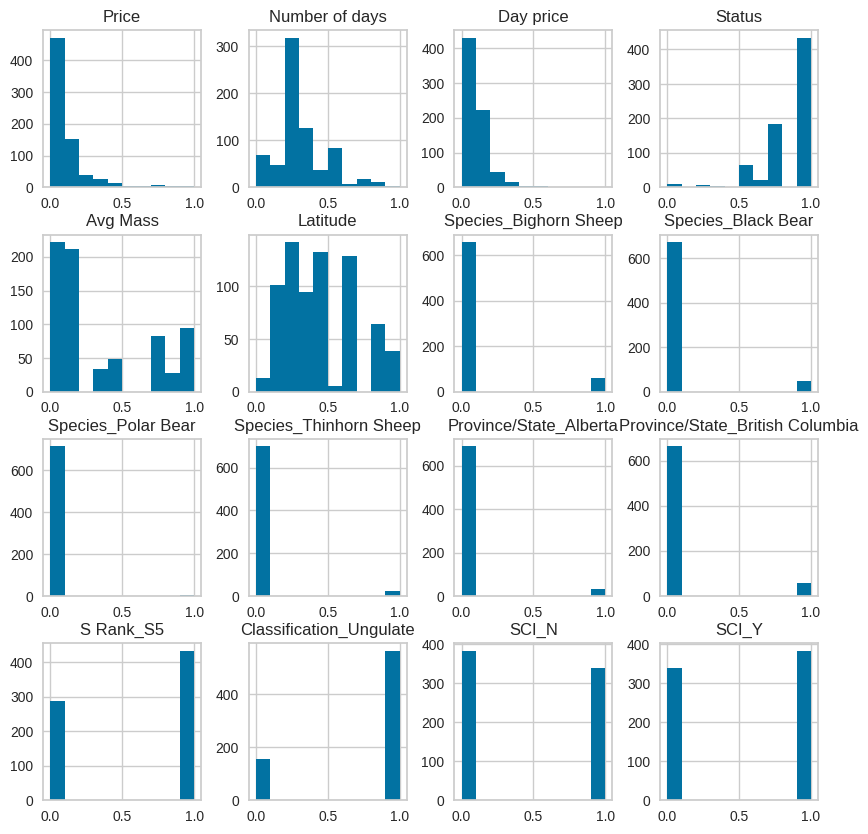

In [ ]:
data.hist(figsize = (10,10));

# K-Means Model

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [ ]:
help(kmeans)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several 

In [ ]:
k_fit = kmeans.fit(data)

In [ ]:
k_fit.n_clusters

4

In [ ]:
k_fit.cluster_centers_

array([[ 2.43714087e-01,  4.76206483e-01,  1.70351022e-01,
         5.98739496e-01,  1.56827434e-01,  5.48451745e-01,
         5.21008403e-01, -1.94289029e-16,  6.93889390e-18,
         1.59663866e-01, -2.49800181e-16,  6.93889390e-18,
        -2.63677968e-16,  1.84873950e-01, -1.11022302e-16,
        -3.46944695e-16,  3.46944695e-18,  3.46944695e-18,
        -1.11022302e-16,  1.34453782e-01, -3.88578059e-16,
         2.60208521e-18,  4.20168067e-02,  4.20168067e-02,
         4.20168067e-02,  2.01680672e-01,  8.40336134e-03,
         5.88235294e-02,  1.73472348e-18,  1.73472348e-18,
         9.24369748e-02,  2.60208521e-18,  2.60208521e-18,
         2.60208521e-18,  8.67361738e-19,  8.67361738e-19,
         5.20417043e-18,  4.20168067e-02,  8.67361738e-19,
         2.60208521e-18,  2.60208521e-18,  8.40336134e-02,
         5.20417043e-18,  3.36134454e-02,  2.60208521e-18,
         1.73472348e-18,  6.72268908e-02,  2.60208521e-18,
         5.20417043e-18,  2.60208521e-18,  8.67361738e-1

In [ ]:
k_fit.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#Görsellestirme

In [ ]:
#iki degisken uzerinden gorsellestirme yapalim (2 boyutta veriyi gorebilmek icin)
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(data)

In [ ]:
kumeler = k_fit.labels_

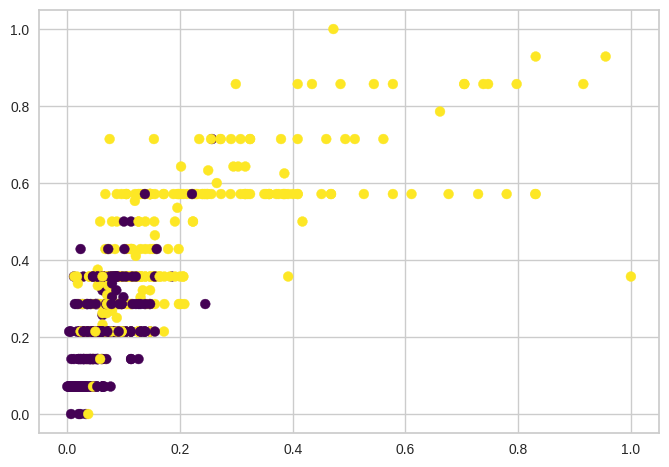

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

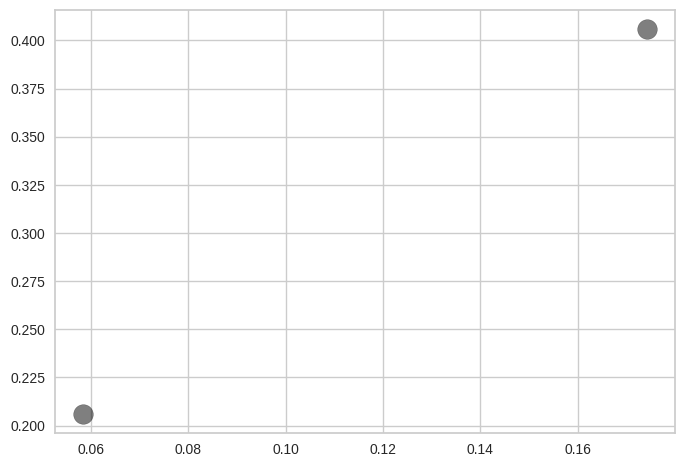

In [ ]:
merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

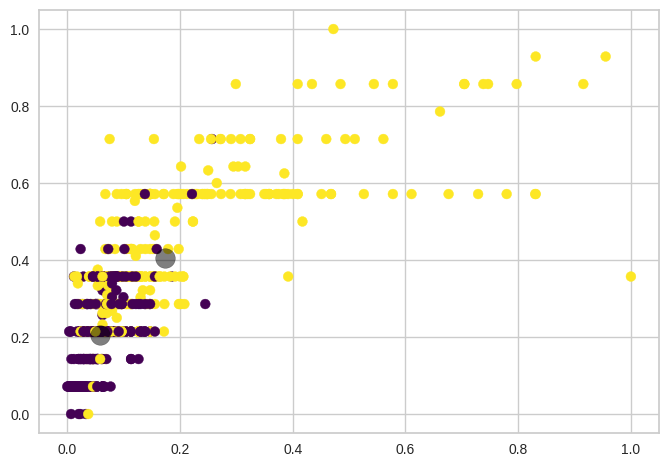

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [ ]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(data)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2],  c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2],
           marker='*',
           s=1000);


<Figure size 1600x900 with 0 Axes>

# Kümeler ve Gözlem Birimleri

In [ ]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(data)
kumeler = k_fit.labels_

In [ ]:
pd.DataFrame({"Günler" : data.index, "Kumeler": kumeler})[0:10]

,Günler,Kumeler
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,2
6,6,2
7,7,2
8,8,2
9,9,2


In [ ]:
data["kume_no"] = kumeler

In [ ]:
data.head()

,Price,Number of days,Day price,Status,Avg Mass,Latitude,Species_Bighorn Sheep,Species_Black Bear,Species_Brown Bear,Species_Caribou,...,S Rank_S3,S Rank_S3S4,S Rank_S4,S Rank_S5,S Rank_S5,Classification_Carnivore,Classification_Ungulate,SCI_N,SCI_Y,kume_no
0,0.255574,0.571429,0.166408,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
1,0.146959,0.571429,0.089595,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
2,0.155405,0.571429,0.095568,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
3,0.197635,0.571429,0.125433,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
4,0.070946,0.214286,0.095568,0.75,0.041481,0.147818,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2


#Optimum Küme Sayısının Belirlenmesi


In [ ]:
data.index.name = None
data.head()

,Price,Number of days,Day price,Status,Avg Mass,Latitude,Species_Bighorn Sheep,Species_Black Bear,Species_Brown Bear,Species_Caribou,...,S Rank_S3,S Rank_S3S4,S Rank_S4,S Rank_S5,S Rank_S5,Classification_Carnivore,Classification_Ungulate,SCI_N,SCI_Y,kume_no
0,0.255574,0.571429,0.166408,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
1,0.146959,0.571429,0.089595,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
2,0.155405,0.571429,0.095568,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
3,0.197635,0.571429,0.125433,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
4,0.070946,0.214286,0.095568,0.75,0.041481,0.147818,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2


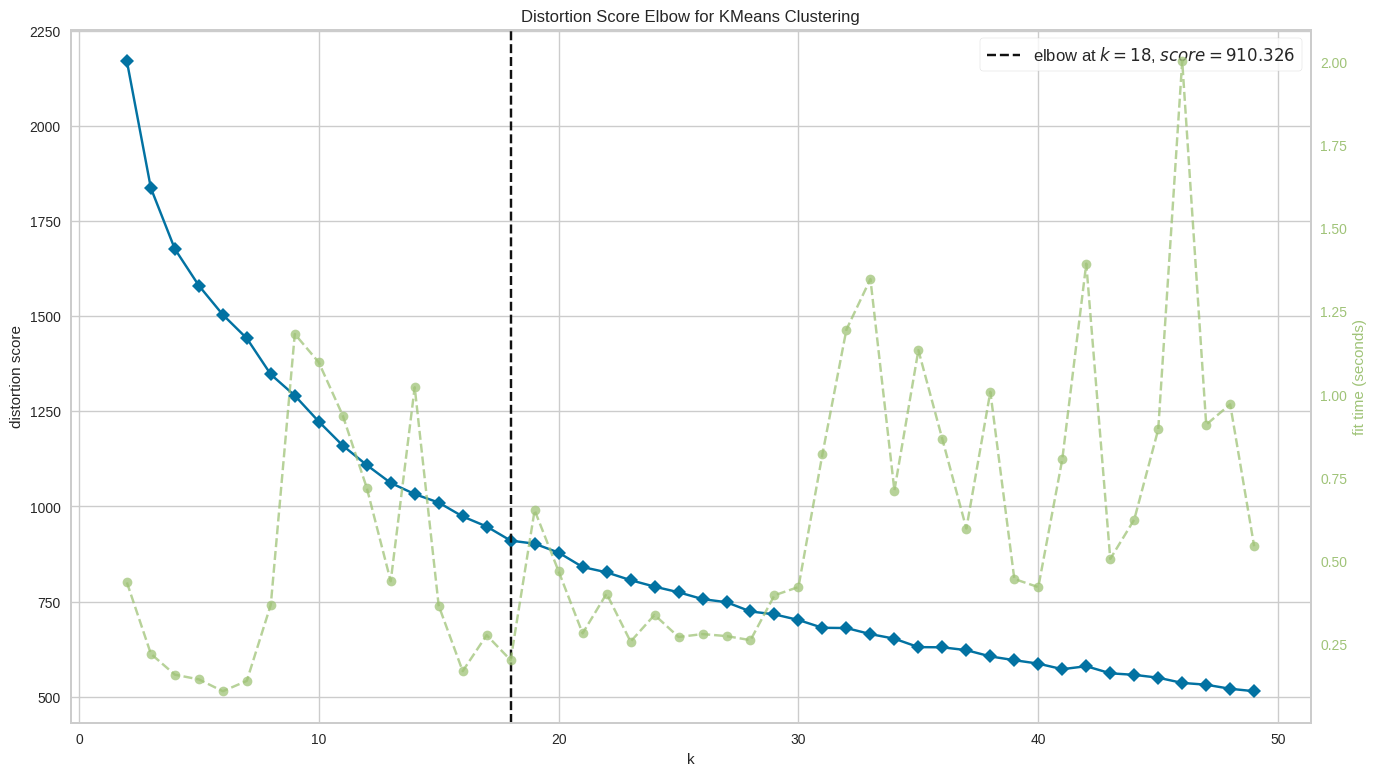

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(data)
visualizer.poof()

In [ ]:
visualizer.elbow_value_

18

En iyi sayı 9 görünüyor

In [ ]:
kmeans = KMeans(n_clusters = 9)
k_fit = kmeans.fit(data)
kumeler = k_fit.labels_

In [ ]:
pd.DataFrame({"Days" : data.index, "Kumeler": kumeler})[0:10]

,Days,Kumeler
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3
5,5,3
6,6,3
7,7,3
8,8,3
9,9,3


# Hiyerarşik Kümeleme



Temel amaç, gözlemleri birbirine olan benzerliklerini kullanarak alt kümelere ayırmaktır.

Agglomerative Hierarchical Clustering işlem adımları:

    Başlangıçta gözlem sayısı kadar küme vardır.
    1. Veriseti içinde birbirine en yakın olan iki gözlemi bul
    2. Bulunan iki noktayı bir araya getir ve yeni bir küme oluştur.
    3. Aynı işlemi tek bir küme kalıncaya kadar tekrarla

In [ ]:
#hiyerarşik kümeleme için metodlar
hc_complete = linkage(data, "complete")
hc_average = linkage(data, "average")
hc_single = linkage(data, "single")

In [ ]:
hc_complete

array([[   8.        ,   10.        ,    0.        ,    2.        ],
       [  45.        ,   46.        ,    0.        ,    2.        ],
       [  39.        ,   40.        ,    0.        ,    2.        ],
       ...,
       [1415.        , 1435.        ,    3.21400145,  123.        ],
       [1436.        , 1437.        ,    3.6721377 ,  598.        ],
       [1438.        , 1439.        ,    4.14392013,  721.        ]])

In [ ]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

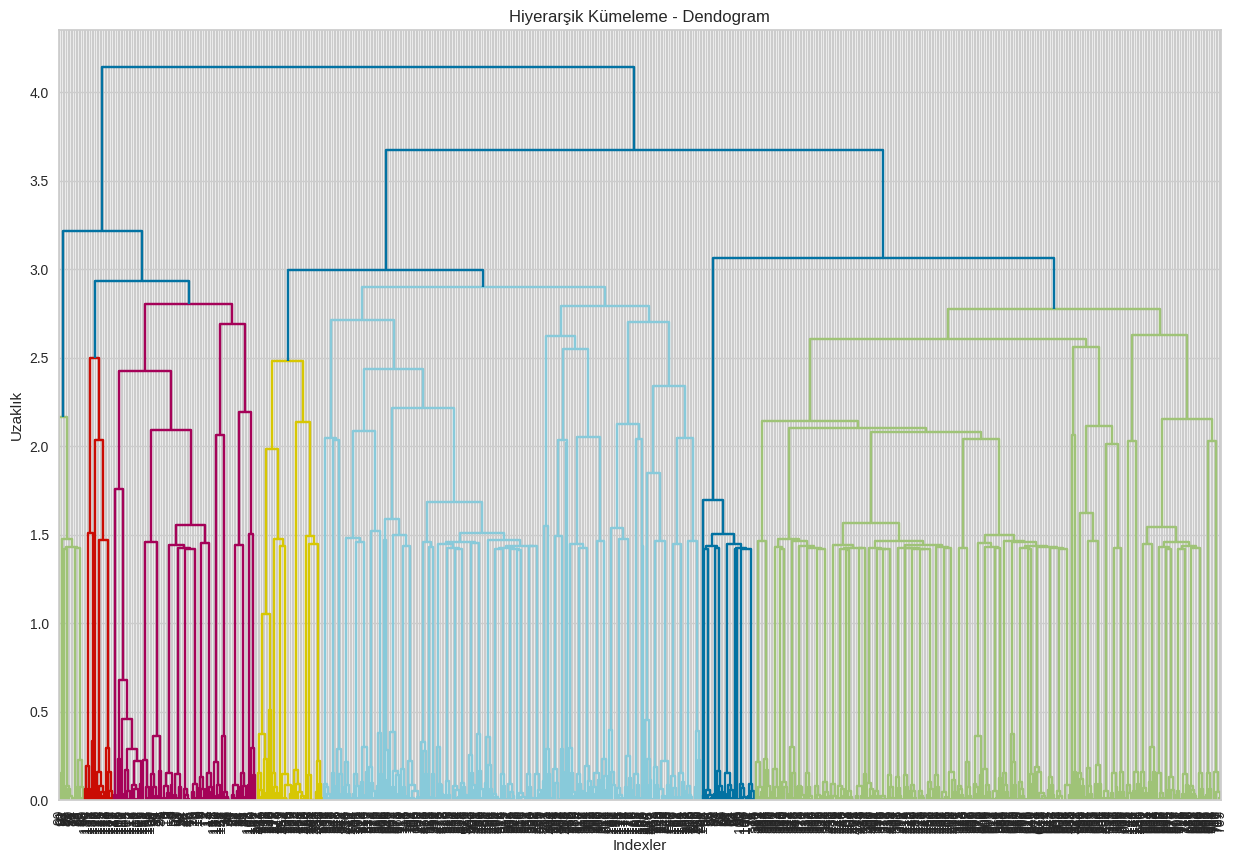

In [ ]:
#dendogramın oluşturulması
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

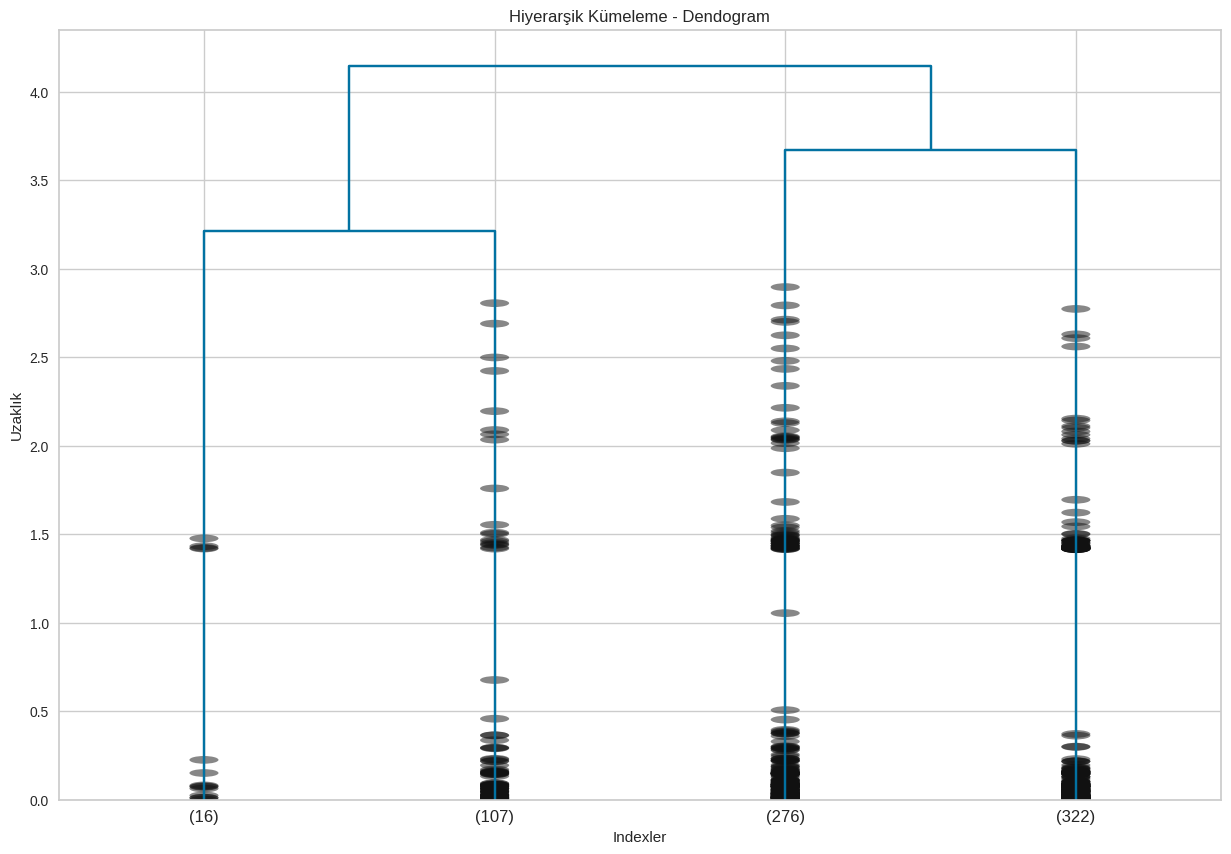

In [ ]:
#son 4 kümeyi göster

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

# Optimum Küme Sayısının Belirlenmesi

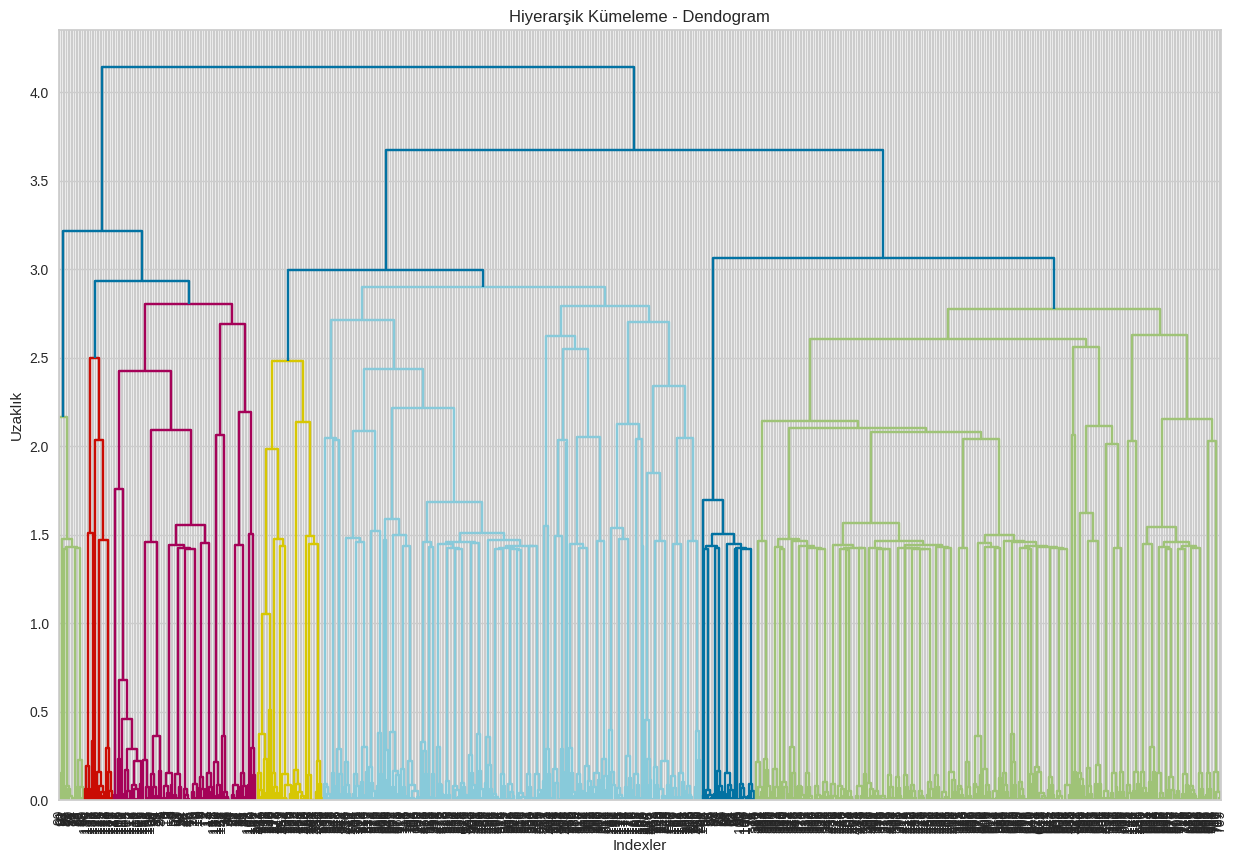

In [ ]:

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [ ]:
help(den)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va

In [ ]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

In [ ]:
#ustteki grafikte uzaklik kısmında 100 dogrultusuna bakarak 4 uygun olabilir denilebilir.
#uzman yorumuyla birlikte farkli değerler de seçilebilir
cluster = AgglomerativeClustering(n_clusters = 4,
                                  affinity = "euclidean",
                                  linkage = "ward")

cluster.fit_predict(data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
pd.DataFrame({"Days" : data.index, "Kumeler": cluster.fit_predict(data)})[0:10]

,Days,Kumeler
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,2
6,6,2
7,7,2
8,8,2
9,9,2


In [ ]:
data["kume_no"] = cluster.fit_predict(data)

In [ ]:
data.head()

,Price,Number of days,Day price,Status,Avg Mass,Latitude,Species_Bighorn Sheep,Species_Black Bear,Species_Brown Bear,Species_Caribou,...,S Rank_S3,S Rank_S3S4,S Rank_S4,S Rank_S5,S Rank_S5,Classification_Carnivore,Classification_Ungulate,SCI_N,SCI_Y,kume_no
0,0.255574,0.571429,0.166408,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
1,0.146959,0.571429,0.089595,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
2,0.155405,0.571429,0.095568,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
3,0.197635,0.571429,0.125433,0.75,0.041481,0.639951,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2
4,0.070946,0.214286,0.095568,0.75,0.041481,0.147818,0,0,False,False,...,False,False,True,0,False,True,0,0,1,2


#PCA (Temel Bileşen Analizi)

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken ile temsil etmektir. Değişken boyutunu azaltma yöntemine gider.



In [ ]:
data.index = data.iloc[:,0]
data = data.iloc[:,1:5]
#del df.index.name
data.head()

,Number of days,Day price,Status,Avg Mass
Price,,,,
0.255574,0.571429,0.166408,0.75,0.041481
0.146959,0.571429,0.089595,0.75,0.041481
0.155405,0.571429,0.095568,0.75,0.041481
0.197635,0.571429,0.125433,0.75,0.041481
0.070946,0.214286,0.095568,0.75,0.041481


In [ ]:
#veri standardizasyonu
data = StandardScaler().fit_transform(data)
data[0:5,0:5]

array([[ 1.45281987,  0.69681605, -0.5363608 , -0.88216544],
       [ 1.45281987, -0.2281255 , -0.5363608 , -0.88216544],
       [ 1.45281987, -0.15620159, -0.5363608 , -0.88216544],
       [ 1.45281987,  0.20341799, -0.5363608 , -0.88216544],
       [-0.54882949, -0.15620159, -0.5363608 , -0.88216544]])

In [ ]:
#herhangi bir boyut indirgemesi yapmadan tum degiskenler icin bilesen olusturalim
pca = PCA()
pca_fit = pca.fit_transform(data)

In [ ]:
bilesen_df = pd.DataFrame(data = pca_fit)
bilesen_df.head()

,0,1,2,3
0,1.380679,0.847063,0.536226,-0.866491
1,0.827998,0.814767,-0.006607,-1.370823
2,0.870975,0.817279,0.035604,-1.331606
3,1.085859,0.829835,0.246659,-1.135521
4,-0.379163,1.091593,-0.129487,0.198510


In [ ]:
pca.explained_variance_ratio_

array([0.44120816, 0.27451896, 0.16166867, 0.12260421])

In [ ]:
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(data)

In [ ]:
bilesen_df = pd.DataFrame(data = pca_fit,
                          columns = ["birinci_bilesen","ikinci_bilesen"])
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen
0,1.380679,0.847063
1,0.827998,0.814767
2,0.870975,0.817279
3,1.085859,0.829835
4,-0.379163,1.091593


In [ ]:
pca.explained_variance_ratio_

array([0.44120816, 0.27451896])

Birinci bileşenin verisetindeki varyansı açıklayabilme oranı 0.44120816, ikinci bileşenin verisetindeki varyansı açıklayabilme oranı 0.27451896

In [ ]:
pca = PCA().fit(data)

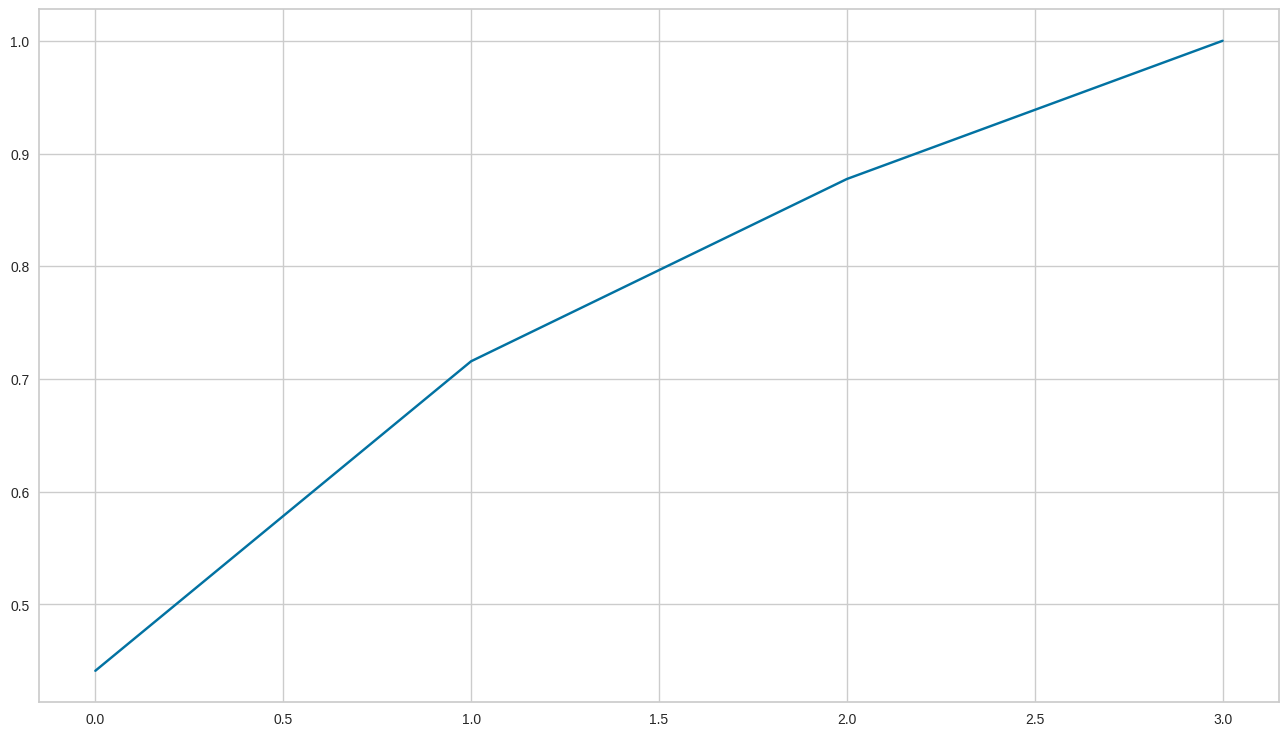

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Kaynaklar

Breiman, L. (2001). "Random Forests". Machine Learning, 45(1), 5-32.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). "The Elements of Statistical Learning: Data Mining, Inference, and Prediction". Springer Science & Business Media.

Liaw, A., & Wiener, M. (2002). "Classification and regression by randomForest". R News, 2(3), 18-22.

Cutler, D. R., Edwards Jr, T. C., Beard, K. H., Cutler, A., Hess, K. T., Gibson, J., & Lawler, J. J. (2007). "Random forests for classification in ecology". Ecology, 88(11), 2783-2792.

Genuer, R., Poggi, J. M., & Tuleau-Malot, C. (2010). "Variable selection using random forests". Pattern Recognition Letters, 31(14), 2225-2236.

Pal, M., & Mather, P. M. (2005). "Assessment of the effectiveness of support vector machines and random forests for land cover classification". ISPRS Journal of Photogrammetry and Remote Sensing, 60(5), 315-327.

Prasad, A. M., Iverson, L. R., & Liaw, A. (2006). "Newer classification and regression tree techniques: bagging and random forests for ecological prediction". Ecosystems, 9(2), 181-199.

Segal, M. R. (2004). "Machine learning benchmarks and random forest regression". Bioinformatics, 20(18), 3478-3484.

Cutler, D. R., Cutler, A., & Stevens, J. R. (2012). "Random Forests". Ensemble machine learning, 157-175.

Strobl, C., Boulesteix, A. L., Zeileis, A., & Hothorn, T. (2007). "Bias in random forest variable importance measures: Illustrations, sources and a solution". BMC bioinformatics, 8(1), 25.